## DATA ANALYSIS ON CREDIT WORTHINESS OF THE APPLICANT

In [ ]:
#importing the necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# readding the data
df=pd.read_excel('train.xlsx')

In [ ]:
# First 5 rows of the dataframe
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,294853,Male,No,0,Graduate,No,1316025,0.0,250000,360.0,1.0,Urban,Y
1,162883,Male,Yes,1,Graduate,No,1031175,339300.0,256000,360.0,1.0,Rural,N
2,620668,Male,Yes,0,Graduate,Yes,675000,0.0,132000,360.0,1.0,Urban,Y
3,295747,Male,Yes,0,Not Graduate,No,581175,530550.0,240000,360.0,1.0,Urban,Y
4,133390,Male,No,0,Graduate,No,1350000,0.0,282000,360.0,1.0,Urban,Y


In [ ]:
# creating the summary of the data
def get_summary(df):
  print("The shape of data is : ",df.shape)
  summary=pd.DataFrame(df.dtypes,columns=['Data_Type'])
  summary=summary.reset_index()
  summary['Name']=summary['index']
  summary=summary[['Name','Data_Type']]
  summary['Missing']=df.isnull().sum().values
  summary['unique']=df.nunique().values
  summary['per_missing']=(df.isnull().sum().values/df.shape[0])*100
  return summary

In [ ]:
get_summary(df)

The shape of data is :  (521, 13)


,Name,Data_Type,Missing,unique,per_missing
0,Loan_ID,int64,0,521,0.000000
1,Gender,object,10,2,1.919386
2,Married,object,3,2,0.575816
3,Dependents,object,13,4,2.495202
4,Education,object,0,2,0.000000
5,Self_Employed,object,27,2,5.182342
6,ApplicantIncome,int64,0,433,0.000000
7,CoapplicantIncome,float64,0,250,0.000000
8,LoanAmount,int64,0,185,0.000000
9,Loan_Amount_Term,float64,14,10,2.687140


In [ ]:
# calculting the percentage of null values
print("Percentage of loss of rows after removing the null values :",((df.shape[0]-df.dropna().shape[0])/df.shape[0]) *100)

Percentage of loss of rows after removing the null values : 19.001919385796544


**Loosing 19% rows is much as we have less of data so, we will treat the null values**

In [ ]:
df.dropna().shape[0]

422

In [ ]:
#Now checking all the unique values
def get_unique(df):
  for x in df.columns:
    if df[x].dtype=='object':
      print("------------------------------------")
      print("Unique Values of ",x," is:-")
      print(df[x].value_counts())
      print("------------------------------------")
      print("\n")

In [ ]:
get_unique(df)

------------------------------------
Unique Values of  Gender  is:-
Male      415
Female     96
Name: Gender, dtype: int64
------------------------------------


------------------------------------
Unique Values of  Married  is:-
Yes    335
No     183
Name: Married, dtype: int64
------------------------------------


------------------------------------
Unique Values of  Dependents  is:-
0     299
1      84
2      84
3+     41
Name: Dependents, dtype: int64
------------------------------------


------------------------------------
Unique Values of  Education  is:-
Graduate        408
Not Graduate    113
Name: Education, dtype: int64
------------------------------------


------------------------------------
Unique Values of  Self_Employed  is:-
No     427
Yes     67
Name: Self_Employed, dtype: int64
------------------------------------


------------------------------------
Unique Values of  Property_Area  is:-
Semiurban    197
Urban        176
Rural        148
Name: Property_Area, d

In [ ]:
df['Credit_History'].value_counts()

1.0    405
0.0     73
Name: Credit_History, dtype: int64

In [ ]:
df['Loan_Amount_Term'].value_counts()

360.0    432
180.0     36
480.0     14
300.0     13
120.0      3
240.0      3
60.0       2
84.0       2
36.0       1
12.0       1
Name: Loan_Amount_Term, dtype: int64

#IMPUTATION OF NULL VALUES
Since ALL ARE CATEGORICAL WE WILL FILL WITH THE MODE


In [ ]:
df_1=df

In [ ]:
df_1['Gender'] = df_1['Gender'].fillna(df_1['Gender'].mode()[0])

In [ ]:
df_1['Married'] = df_1['Married'].fillna(df_1['Married'].mode()[0])

In [ ]:
df_1['Dependents'] = df_1['Dependents'].fillna(df_1['Dependents'].mode()[0])

In [ ]:
df_1['Self_Employed'] = df_1['Self_Employed'].fillna(df_1['Self_Employed'].mode()[0])

In [ ]:
df_1['Loan_Amount_Term'] = df_1['Loan_Amount_Term'].fillna(df_1['Loan_Amount_Term'].mode()[0])

In [ ]:
df_1['Credit_History'] = df_1['Credit_History'].fillna(df_1['Credit_History'].mode()[0])

In [ ]:
get_summary(df_1)

The shape of data is :  (521, 13)


,Name,Data_Type,Missing,unique,per_missing
0,Loan_ID,int64,0,521,0.0
1,Gender,object,0,2,0.0
2,Married,object,0,2,0.0
3,Dependents,object,0,4,0.0
4,Education,object,0,2,0.0
5,Self_Employed,object,0,2,0.0
6,ApplicantIncome,int64,0,433,0.0
7,CoapplicantIncome,float64,0,250,0.0
8,LoanAmount,int64,0,185,0.0
9,Loan_Amount_Term,float64,0,10,0.0


# PERFORMING EDA ON DATA

***Overall Analysis***


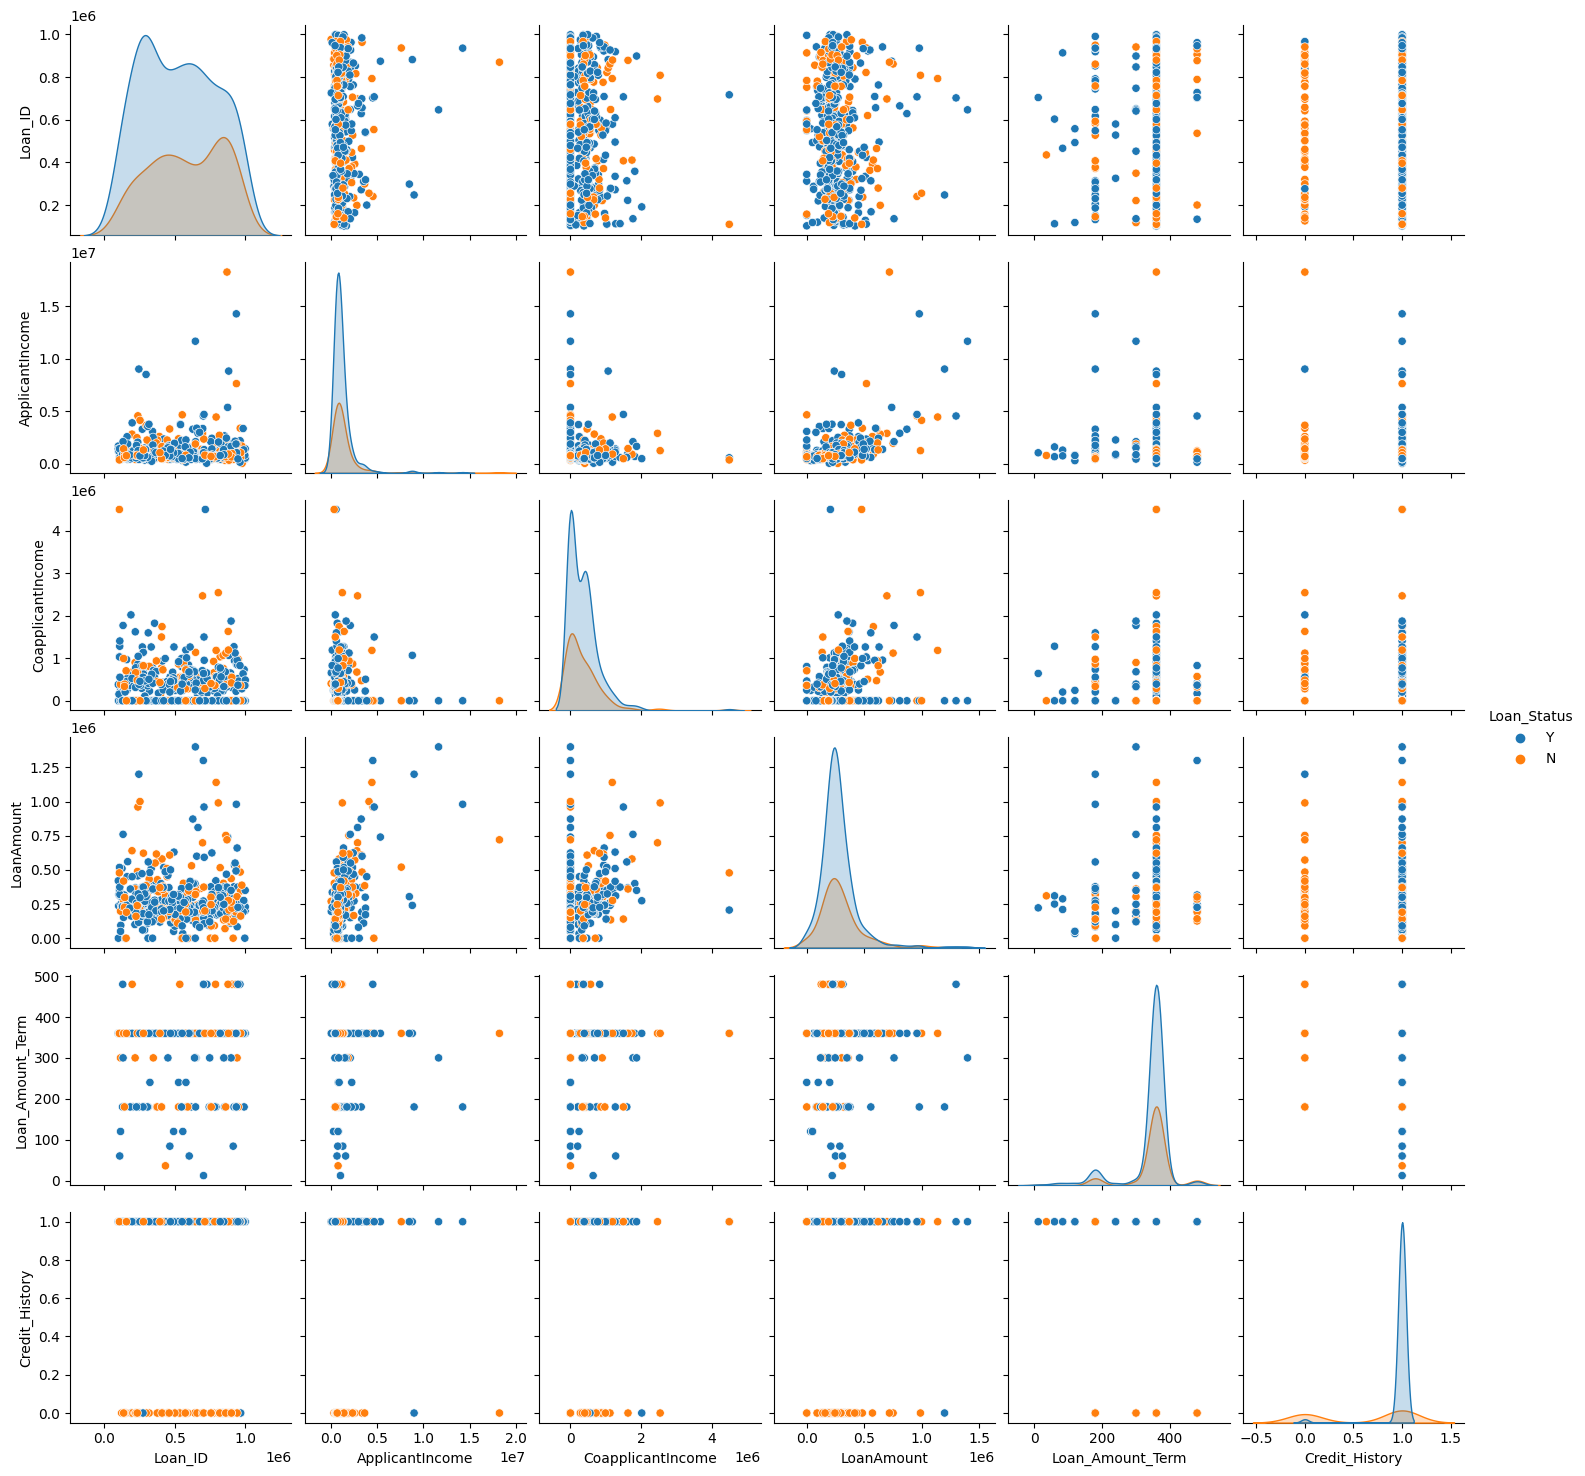

In [ ]:
sns.pairplot(data=df_1,hue='Loan_Status')

In [ ]:
# countplot for Loan Status
import plotly.express as px
px.histogram(df_1, x="Loan_Status",color='Loan_Status',text_auto=True)

**Inference:- We can say data is imbalance as we have 68% of data of acceptance and only 32% of rejection of Loan.**


# Gender Analysis
(Assumption :- That gender won't be an important factor in determining the loan approval status)

In [ ]:
# checking the gender count
px.histogram(df_1, x="Gender",color='Loan_Status',text_auto=True)

In [ ]:
px.histogram(df_1, x="Gender",color='Loan_Status',text_auto=True,barnorm="percent")

**Inference:- We can say that loan approval is not biased on the basis of Gender, although we find that males contribute 82% of data compared to female.**

Statistical Analysis of Gender


In [ ]:
# comparing the gender with other features
from scipy.stats import chi2_contingency

# Create a cross-tabulation of gender and each categorical feature
categorical_features = ['Married','Dependents','Education', 'Self_Employed', 'Property_Area','Credit_History']
for feature in categorical_features:
    contingency_table = pd.crosstab(df_1['Gender'], df_1[feature])
    chi2, p, dof, expected = chi2_contingency(contingency_table)

    # Print the results
    print(f"Chi-square test for {feature}:")
    print(f"Chi-square statistic: {chi2}")
    print(f"P-value: {p}")
    if p < 0.05:
        print("There is a significant association between gender and the ",feature)
    else:
        print("There is no significant association between gender and the ",feature)
    print("")


Chi-square test for Married:
Chi-square statistic: 71.7416697781406
P-value: 2.4529732371768712e-17
There is a significant association between gender and the  Married

Chi-square test for Dependents:
Chi-square statistic: 15.207288103953278
P-value: 0.0016478077549168541
There is a significant association between gender and the  Dependents

Chi-square test for Education:
Chi-square statistic: 0.8294346244945362
P-value: 0.36243606417390717
There is no significant association between gender and the  Education

Chi-square test for Self_Employed:
Chi-square statistic: 0.0
P-value: 1.0
There is no significant association between gender and the  Self_Employed

Chi-square test for Property_Area:
Chi-square statistic: 3.267172198166316
P-value: 0.19522820959375897
There is no significant association between gender and the  Property_Area

Chi-square test for Credit_History:
Chi-square statistic: 0.0002538966945939451
P-value: 0.9872869367522458
There is no significant association between gende

In [ ]:
from scipy.stats import ttest_ind

male_income = df[df_1['Gender'] == 'Male']['ApplicantIncome']
female_income = df[df_1['Gender'] == 'Female']['ApplicantIncome']
t_stat, p_value = ttest_ind(male_income, female_income)
print("T-test for ApplicantIncome:")
print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")
if p_value < 0.05:
    print("There is a significant difference in ApplicantIncome between male and female applicants.")
else:
    print("There is no significant difference in ApplicantIncome between male and female applicants.")

T-test for ApplicantIncome:
T-statistic: 1.6688974091945388
P-value: 0.09574078769923913
There is no significant difference in ApplicantIncome between male and female applicants.


In [ ]:

from scipy.stats import ttest_ind

male_income = df[df_1['Gender'] == 'Male']['LoanAmount']
female_income = df[df_1['Gender'] == 'Female']['LoanAmount']
t_stat, p_value = ttest_ind(male_income, female_income)
print("T-test for LoanAmount:")
print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")
if p_value < 0.05:
    print("There is a significant difference in loan amount between male and female applicants.")
else:
    print("There is no significant difference in loan amount between male and female applicants.")

T-test for LoanAmount:
T-statistic: 3.0743438709243893
P-value: 0.0022206841419373834
There is a significant difference in loan amount between male and female applicants.


**Inference:- We found certain significant relationship between gender and following features :- Loan Amount,Married and Dependents**

In [ ]:
# Analysing the relationship further
gender=pd.DataFrame(df_1.groupby(by=['Gender','Married','Loan_Status'])['Loan_ID'].count()).reset_index()
gender['percentage'] = gender.groupby(['Gender', 'Married','Loan_Status']).sum('Loan_ID').groupby(level=0).apply(lambda x: 100 * x / float(x.sum())).values

<ipython-input-29-8f4d0e3a115b>:3: FutureWarning:

Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)



In [ ]:
gender

,Gender,Married,Loan_Status,Loan_ID,percentage
0,Female,No,N,24,25.000000
1,Female,No,Y,46,47.916667
2,Female,Yes,N,8,8.333333
3,Female,Yes,Y,18,18.750000
4,Male,No,N,44,10.352941
5,Male,No,Y,69,16.235294
6,Male,Yes,N,87,20.470588
7,Male,Yes,Y,225,52.941176


In [ ]:
px.bar(gender, x="Gender", y="percentage", color="Loan_Status", pattern_shape="Married",text_auto=True)

**This is the clear indication that if you are Married Male and you are unmarried Female you have high chances of getting the Loan approval.**

In [ ]:
# now checking for Gender and dependents
dep=pd.DataFrame(df_1.groupby(by=['Gender','Dependents','Loan_Status'])['Loan_ID'].count()).reset_index()
dep['percentage'] = dep.groupby(['Gender', 'Dependents','Loan_Status']).sum('Loan_ID').groupby(level=0).apply(lambda x: 100 * x / float(x.sum())).values

<ipython-input-32-9def21bb28fb>:3: FutureWarning:

Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)



In [ ]:
dep

,Gender,Dependents,Loan_Status,Loan_ID,percentage
0,Female,0,N,23,23.958333
1,Female,0,Y,49,51.041667
2,Female,1,N,6,6.250000
3,Female,1,Y,9,9.375000
4,Female,2,N,2,2.083333
5,Female,2,Y,5,5.208333
6,Female,3+,N,1,1.041667
7,Female,3+,Y,1,1.041667
8,Male,0,N,75,17.647059
9,Male,0,Y,165,38.823529


In [ ]:
px.bar(dep, x="Gender", y="percentage", color="Loan_Status", pattern_shape="Dependents",text_auto=True)

**This is to be noted that if you dont have any dependent you have high chance of approval of loan.**




# Analysis Of Married Feature
(Assumption:- Marital status can play a role in loan approval as married individuals might be perceived as more financially stable and responsible compared to unmarried. However, this needs to be analysed carefully to avoid any biased decision-making.)


In [ ]:
px.histogram(df_1, x="Married",color='Loan_Status',text_auto=True)

In [ ]:
px.histogram(df_1, x="Married",color='Loan_Status',text_auto=True,barnorm="percent")

**It is inferred that there is no distinctional difference that infer that married people are preferred more that unmarried.**

STATISTICAL ANALYSIS OF MARRIED ANALYSIS

In [ ]:
# comparing the Married with other features
from scipy.stats import chi2_contingency

# Create a cross-tabulation of Married and each categorical feature
categorical_features = ['Dependents','Education', 'Self_Employed', 'Property_Area','Credit_History']
for feature in categorical_features:
    contingency_table = pd.crosstab(df_1['Married'], df_1[feature])
    chi2, p, dof, expected = chi2_contingency(contingency_table)

    # Print the results
    print(f"Chi-square test for {feature}:")
    print(f"Chi-square statistic: {chi2}")
    print(f"P-value: {p}")
    if p < 0.05:
        print("There is a significant association between married and the ",feature)
    else:
        print("There is no significant association between married and the ",feature)
    print("")


Chi-square test for Dependents:
Chi-square statistic: 68.34167400296097
P-value: 9.667133758979138e-15
There is a significant association between married and the  Dependents

Chi-square test for Education:
Chi-square statistic: 0.23805820705655933
P-value: 0.625612110937855
There is no significant association between married and the  Education

Chi-square test for Self_Employed:
Chi-square statistic: 0.0
P-value: 1.0
There is no significant association between married and the  Self_Employed

Chi-square test for Property_Area:
Chi-square statistic: 1.3480289377479895
P-value: 0.5096584574538979
There is no significant association between married and the  Property_Area

Chi-square test for Credit_History:
Chi-square statistic: 0.0515768884697121
P-value: 0.8203417410604339
There is no significant association between married and the  Credit_History



In [ ]:
from scipy.stats import ttest_ind

married_income = df[df_1['Married'] == 'Yes']['ApplicantIncome']
unmarried_income = df[df_1['Married'] == 'No']['ApplicantIncome']
t_stat, p_value = ttest_ind(married_income, unmarried_income)
print("T-test for ApplicantIncome:")
print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")
if p_value < 0.05:
    print("There is a significant difference in ApplicantIncome between married and unmarried applicants.")
else:
    print("There is no significant difference in ApplicantIncome between married and unmarried applicants.")

T-test for ApplicantIncome:
T-statistic: 1.0085170689159018
P-value: 0.3136762484946586
There is no significant difference in ApplicantIncome between married and unmarried applicants.


In [ ]:
from scipy.stats import ttest_ind

married_income = df[df_1['Married'] == 'Yes']['LoanAmount']
unmarried_income = df[df_1['Married'] == 'No']['LoanAmount']
t_stat, p_value = ttest_ind(married_income, unmarried_income)
print("T-test for ApplicantIncome:")
print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")
if p_value < 0.05:
    print("There is a significant difference in LoanAmount between married and unmarried applicants.")
else:
    print("There is no significant difference in LoanAmount between married and unmarried applicants.")

T-test for ApplicantIncome:
T-statistic: 2.6071631112070155
P-value: 0.009392246352747843
There is a significant difference in LoanAmount between married and unmarried applicants.


**Whether a person is married or not is related with dependents and Loan Amount**

In [ ]:
# doing further analysis
married=pd.DataFrame(df_1.groupby(by=['Married','Dependents','Loan_Status'])['Loan_ID'].count()).reset_index()
married['percentage'] = married.groupby(['Married','Dependents','Loan_Status']).sum('Loan_ID').groupby(level=0).apply(lambda x: 100 * x / float(x.sum())).values

<ipython-input-40-5772fc09a5a8>:3: FutureWarning:

Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)



In [ ]:
married

,Married,Dependents,Loan_Status,Loan_ID,percentage
0,No,0,N,55,30.054645
1,No,0,Y,97,53.005464
2,No,1,N,9,4.918033
3,No,1,Y,11,6.010929
4,No,2,N,2,1.092896
5,No,2,Y,4,2.185792
6,No,3+,N,2,1.092896
7,No,3+,Y,3,1.639344
8,Yes,0,N,43,12.721893
9,Yes,0,Y,117,34.615385


In [ ]:
px.bar(married, x="Married", y="percentage", color="Loan_Status", pattern_shape="Dependents",text_auto=True)

**If you are unmarried and no dependents you have chance of getting approval keeping other things into consideration**



#Analysis Of Education
Education level may also influence loan approval decisions. Higher education might be associated with better job opportunities and higher income.
The two assumptions can be that educated people might need loan less and if they need it will be approved easily considering the income.


In [ ]:
px.histogram(df_1, x="Education",color='Loan_Status',text_auto=True)

In [ ]:
px.histogram(df_1, x="Education",color='Loan_Status',text_auto=True,barnorm="percent")

**If you are graduate you have high chances of getting approval of loan**.

---



In [ ]:
from scipy.stats import chi2_contingency

# Create a cross-tabulation of Married and each categorical feature
categorical_features = ['Dependents', 'Self_Employed', 'Property_Area','Credit_History']
for feature in categorical_features:
    contingency_table = pd.crosstab(df_1['Education'], df_1[feature])
    chi2, p, dof, expected = chi2_contingency(contingency_table)

    # Print the results
    print(f"Chi-square test for {feature}:")
    print(f"Chi-square statistic: {chi2}")
    print(f"P-value: {p}")
    if p < 0.05:
        print("There is a significant association between education and the ",feature)
    else:
        print("There is no significant association between education and the ",feature)
    print("")


Chi-square test for Dependents:
Chi-square statistic: 6.522441833240679
P-value: 0.08878164279040658
There is no significant association between education and the  Dependents

Chi-square test for Self_Employed:
Chi-square statistic: 0.00010114312075623089
P-value: 0.9919758153246043
There is no significant association between education and the  Self_Employed

Chi-square test for Property_Area:
Chi-square statistic: 3.6211475037881407
P-value: 0.16356026686334393
There is no significant association between education and the  Property_Area

Chi-square test for Credit_History:
Chi-square statistic: 5.51344559691584
P-value: 0.0188708355472774
There is a significant association between education and the  Credit_History



In [ ]:
from scipy.stats import ttest_ind

grad = df[df_1['Education'] == 'Graduate']['ApplicantIncome']
not_grad = df[df_1['Education'] == 'Not Graduate']['ApplicantIncome']
t_stat, p_value = ttest_ind(married_income, unmarried_income)
print("T-test for ApplicantIncome:")
print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")
if p_value < 0.05:
    print("There is a significant difference in ApplicantIncome between graduate and not graduate.")
else:
    print("There is no significant difference in ApplicantIncome between graduate and not graduate.")

T-test for ApplicantIncome:
T-statistic: 2.6071631112070155
P-value: 0.009392246352747843
There is a significant difference in ApplicantIncome between graduate and not graduate.


In [ ]:
from scipy.stats import ttest_ind

grad= df[df_1['Education'] == 'Graduate']['LoanAmount']
not_grad = df[df_1['Education'] == 'Not Graduate']['LoanAmount']
t_stat, p_value = ttest_ind(married_income, unmarried_income)
print("T-test for ApplicantIncome:")
print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")
if p_value < 0.05:
    print("There is a significant difference in Loan Amount between graduate and not graduate.")
else:
    print("There is no significant difference in Loan Amount between graduate and not graduate.")

T-test for ApplicantIncome:
T-statistic: 2.6071631112070155
P-value: 0.009392246352747843
There is a significant difference in Loan Amount between graduate and not graduate.


In [ ]:
# Further Analysis
edu=pd.DataFrame(df_1.groupby(by=['Education','Credit_History','Loan_Status'])['Loan_ID'].count()).reset_index()
edu['percentage'] = edu.groupby(['Education','Credit_History','Loan_Status']).sum('Loan_ID').groupby(level=0).apply(lambda x: 100 * x / float(x.sum())).values

<ipython-input-48-ae2f07de1569>:3: FutureWarning:

Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)



In [ ]:
edu

,Education,Credit_History,Loan_Status,Loan_ID,percentage
0,Graduate,0.0,N,43,10.539216
1,Graduate,0.0,Y,6,1.470588
2,Graduate,1.0,N,74,18.137255
3,Graduate,1.0,Y,285,69.852941
4,Not Graduate,0.0,N,24,21.238938
5,Not Graduate,1.0,N,22,19.469027
6,Not Graduate,1.0,Y,67,59.292035


In [ ]:
px.bar(edu, x="Education", y="percentage", color="Loan_Status", pattern_shape="Credit_History",text_auto=True)

**Inference :- You have 70% chance of loan approval if you are graduated and have credit history**

#Analysis of Dependents
Assumption-The number of dependents could affect loan approval as individuals with more dependents might have higher financial obligations due to the expenses that incur.

In [ ]:
df_1['Dependents']=df_1['Dependents'].astype(str)

In [ ]:
px.histogram(df_1, x="Dependents",color='Loan_Status',text_auto=True)

In [ ]:
px.histogram(df_1, x="Dependents",color='Loan_Status',text_auto=True,barnorm="percent")

**Inference:- Dependents only is not the major factor in deciding the Loan
Approval.**

In [ ]:
from scipy.stats import chi2_contingency

# Create a cross-tabulation of Dependents and each categorical feature
categorical_features = [ 'Self_Employed', 'Property_Area','Credit_History']
for feature in categorical_features:
    contingency_table = pd.crosstab(df_1['Dependents'], df_1[feature])
    chi2, p, dof, expected = chi2_contingency(contingency_table)

    # Print the results
    print(f"Chi-square test for {feature}:")
    print(f"Chi-square statistic: {chi2}")
    print(f"P-value: {p}")
    if p < 0.05:
        print("There is a significant association between dependents and the ",feature)
    else:
        print("There is no significant association between dependents and the ",feature)
    print("")

Chi-square test for Self_Employed:
Chi-square statistic: 8.632288768951469
P-value: 0.0346011955634361
There is a significant association between dependents and the  Self_Employed

Chi-square test for Property_Area:
Chi-square statistic: 7.90827859411202
P-value: 0.2449003841998677
There is no significant association between dependents and the  Property_Area

Chi-square test for Credit_History:
Chi-square statistic: 4.176525303424171
P-value: 0.24302268136373328
There is no significant association between dependents and the  Credit_History



# Analysis of Self-Employed
Assumption-Self-employed individuals may face different considerations during loan approval, as their income stability might vary compared to salaried applicants. So self_employed individual are people who may require bigger loans as well.

In [ ]:
px.histogram(df_1, x="Self_Employed",color='Loan_Status',text_auto=True)

In [ ]:
px.histogram(df_1, x="Self_Employed",color='Loan_Status',text_auto=True,barnorm="percent")

**Inference :- Self-Employed status has no impact on Loan Approval.**

In [ ]:
from scipy.stats import chi2_contingency

# Create a cross-tabulation of self_employed and each categorical feature
categorical_features = ['Property_Area','Credit_History']
for feature in categorical_features:
    contingency_table = pd.crosstab(df_1['Self_Employed'], df_1[feature])
    chi2, p, dof, expected = chi2_contingency(contingency_table)

    # Print the results
    print(f"Chi-square test for {feature}:")
    print(f"Chi-square statistic: {chi2}")
    print(f"P-value: {p}")
    if p < 0.05:
        print("There is a significant association between self_employed and the ",feature)
    else:
        print("There is no significant association between self_employed and the ",feature)
    print("")

Chi-square test for Property_Area:
Chi-square statistic: 0.08181864696929936
P-value: 0.9599161678547218
There is no significant association between self_employed and the  Property_Area

Chi-square test for Credit_History:
Chi-square statistic: 0.0
P-value: 1.0
There is no significant association between self_employed and the  Credit_History



In [ ]:
from scipy.stats import ttest_ind

self = df[df_1['Self_Employed'] == 'Yes']['ApplicantIncome']
self_no = df[df_1['Self_Employed'] == 'No']['ApplicantIncome']
t_stat, p_value = ttest_ind(self,self_no)
print("T-test for ApplicantIncome:")
print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")
if p_value < 0.05:
    print("There is a significant difference in ApplicantIncome between person who is self-employed and one who is not.")
else:
    print("There is no significant difference in ApplicantIncome between person who is self-employed and one who is not.")

T-test for ApplicantIncome:
T-statistic: 1.8866681567097963
P-value: 0.0597629077731511
There is no significant difference in ApplicantIncome between person who is self-employed and one who is not.


In [ ]:
from scipy.stats import ttest_ind

self = df[df_1['Self_Employed'] == 'Yes']['LoanAmount']
self_no = df[df_1['Self_Employed'] == 'No']['LoanAmount']
t_stat, p_value = ttest_ind(self,self_no)
print("T-test for ApplicantIncome:")
print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")
if p_value < 0.05:
    print("There is a significant difference in LoanAmount between person who is self-employed and one who is not.")
else:
    print("There is no significant difference in LoanAmount between person who is self-employed and one who is not.")

T-test for ApplicantIncome:
T-statistic: 1.1587984183206812
P-value: 0.24707126231487286
There is no significant difference in LoanAmount between person who is self-employed and one who is not.


In [ ]:
se=pd.DataFrame(df_1.groupby(by=['Education','Self_Employed','Loan_Status'])['Loan_ID'].count()).reset_index()
se['percentage'] = se.groupby(['Education','Self_Employed','Loan_Status']).sum('Loan_ID').groupby(level=0).apply(lambda x: 100 * x / float(x.sum())).values

<ipython-input-60-3fcd81ad2756>:2: FutureWarning:

Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)



In [ ]:
se

,Education,Self_Employed,Loan_Status,Loan_ID,percentage
0,Graduate,No,N,102,25.000000
1,Graduate,No,Y,253,62.009804
2,Graduate,Yes,N,15,3.676471
3,Graduate,Yes,Y,38,9.313725
4,Not Graduate,No,N,40,35.398230
5,Not Graduate,No,Y,59,52.212389
6,Not Graduate,Yes,N,6,5.309735
7,Not Graduate,Yes,Y,8,7.079646


In [ ]:
px.bar(se, x="Education", y="percentage", color="Loan_Status", pattern_shape="Self_Employed",text_auto=True)

#Analysis of Property Area
The applicant's property location (rural or urban) could be a factor in the loan approval decision, as it may relate to property values and potential for property appreciation.



In [ ]:
px.histogram(df_1, x="Property_Area",color='Loan_Status',text_auto=True)

In [ ]:
px.histogram(df_1, x="Property_Area",color='Loan_Status',text_auto=True,barnorm="percent")

**Inference: If you have property in Semi-Urban you might get loan. Since this sector is getting developed at high speed.**

In [ ]:
from scipy.stats import chi2_contingency
contingency_table = pd.crosstab(df_1['Property_Area'], df_1['Credit_History'])
chi2, p, dof, expected = chi2_contingency(contingency_table)

print(f"Chi-square test for Credit history:")
print(f"Chi-square statistic: {chi2}")
print(f"P-value: {p}")
if p < 0.05:
        print("There is a significant association between property area and credit history")
else:
        print("There is no significant association between property area and credit history")
print("")

Chi-square test for Credit history:
Chi-square statistic: 1.437897418251474
P-value: 0.4872642432413129
There is no significant association between property area and credit history



# Analysis of Credit_History
Credit history is a strong indicator of an applicant's creditworthiness. A positive credit history significantly increases the chances of loan approval.


In [ ]:
df_1['Credit_History']=df_1['Credit_History'].astype(str)

In [ ]:
px.histogram(df_1, x="Credit_History",color='Loan_Status',text_auto=True)

In [ ]:
px.histogram(df_1, x="Credit_History",color='Loan_Status',text_auto=True,barnorm="percent")

**Inference: If you have credit history you have good chances of loan approval**

In [ ]:
from scipy.stats import ttest_ind

yes = df[df_1['Credit_History'] == '1.0']['ApplicantIncome']
no = df[df_1['Credit_History'] == '0.0']['ApplicantIncome']
t_stat, p_value = ttest_ind(yes,no)
print("T-test for ApplicantIncome:")
print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")
if p_value < 0.05:
    print("There is a significant difference in ApplicantIncome between people having credit history and one not having.")
else:
    print("There is no significant difference in ApplicantIncome between people having credit history and one not having.")

T-test for ApplicantIncome:
T-statistic: -0.8078414569632486
P-value: 0.41955195619465935
There is no significant difference in ApplicantIncome between people having credit history and one not having.


In [ ]:
from scipy.stats import ttest_ind

yes = df[df_1['Credit_History'] == '1.0']['LoanAmount']
no = df[df_1['Credit_History'] == '0.0']['LoanAmount']
t_stat, p_value = ttest_ind(yes,no)
print("T-test for ApplicantIncome:")
print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")
if p_value < 0.05:
    print("There is a significant difference in Loan Amount between people having credit history and one not having.")
else:
    print("There is no significant difference in Loan Amount between people having credit history and one not having.")

T-test for ApplicantIncome:
T-statistic: -0.3192847610859055
P-value: 0.749639056769673
There is no significant difference in Loan Amount between people having credit history and one not having.


# Analysis of Applicant Income, CoapplicantIncome, Loan Amount, Loan Term

In [ ]:
# Box plot
fig = px.box(df_1, x="Loan_Status", y="ApplicantIncome",color="Gender")
fig.show()

In [ ]:
# Box plot
fig = px.box(df_1, x="Loan_Status", y="LoanAmount",color="Gender")
fig.show()

In [ ]:
# Scatter plot for ApplicantIncome vs. Loan Amount
px.scatter(df_1,x='LoanAmount',y='ApplicantIncome',color="Loan_Status",symbol='Education')

In [ ]:

import plotly.express as px
fig = px.scatter(df_1,y="ApplicantIncome",x="LoanAmount",color='Loan_Status',symbol='Gender')
fig.show()

In [ ]:
# loan amount - gender, married, education
px.scatter(df_1,x="LoanAmount",y="Loan_Status",symbol="Education",color='Gender')

<ipython-input-76-09ede90f68e5>:2: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



<Axes: >

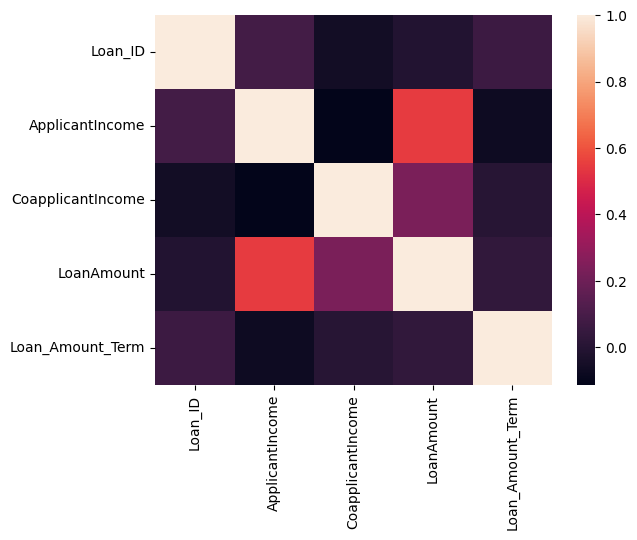

In [ ]:
# checking correlation
sns.heatmap(df_1.corr())

These are the inferences drawn from the above charts:-


    1. Applicant Income has potential outliers and could not be treated as there is no limit to income.
    2. On seperating Applicant Income on the basis of Gender, maximum outliers belomg to the Male class.
    3. Loan Amount has significant impact on Education, gender, and Married.
    4. Highest Loan Amount has been given to male as compared to female.
    5. Aplicant Income and Loan Amount is showing Linear relationship.
    6. Loan Approval is dependent if you are Male and Graduated.
    7. This further has also lead to creating of new features like Total_Income and ratio of LoanAmount to ApplicantIncome.

In [ ]:
df_1

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,294853,Male,No,0,Graduate,No,1316025,0.0,250000,360.0,1.0,Urban,Y
1,162883,Male,Yes,1,Graduate,No,1031175,339300.0,256000,360.0,1.0,Rural,N
2,620668,Male,Yes,0,Graduate,Yes,675000,0.0,132000,360.0,1.0,Urban,Y
3,295747,Male,Yes,0,Not Graduate,No,581175,530550.0,240000,360.0,1.0,Urban,Y
4,133390,Male,No,0,Graduate,No,1350000,0.0,282000,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
516,947032,Female,Yes,2,Graduate,No,456975,367200.0,226000,480.0,1.0,Semiurban,Y
517,756833,Male,Yes,0,Not Graduate,No,691650,405000.0,246000,360.0,0.0,Semiurban,N
518,395763,Male,No,0,Graduate,No,1053675,430875.0,370000,360.0,1.0,Semiurban,N
519,158946,Female,No,0,Not Graduate,No,765000,0.0,190000,360.0,1.0,Rural,N


In [ ]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

# Feature Engineering

In [ ]:
df_1['Total_Income']=df_1['ApplicantIncome']+df_1['CoapplicantIncome']

In [ ]:
df_1['ratio']=df_1['LoanAmount']/df_1['ApplicantIncome']

In [ ]:
df_1['loan_ratio']=df_1['LoanAmount']/df_1['Total_Income']

In [ ]:
df_n=df_1[df_1['Loan_Status']=='N']

In [ ]:
df_y=df_1[df_1['Loan_Status']=='Y']

In [ ]:
x=[df_n['ApplicantIncome'].tolist(),df_y['ApplicantIncome'].tolist()]
y=['No','Yes']

<Axes: xlabel='ApplicantIncome', ylabel='Density'>

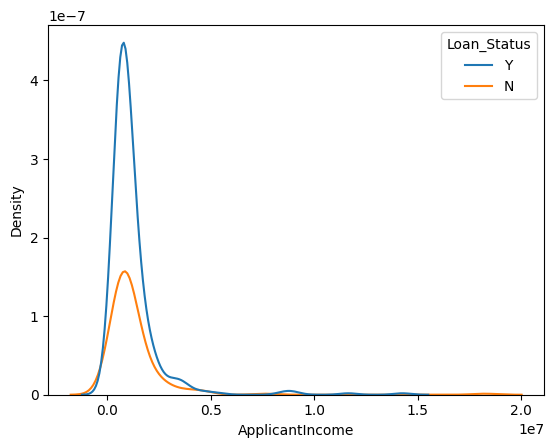

In [ ]:
sns.kdeplot(data=df_1, x="ApplicantIncome", hue="Loan_Status")

<Axes: xlabel='CoapplicantIncome', ylabel='Density'>

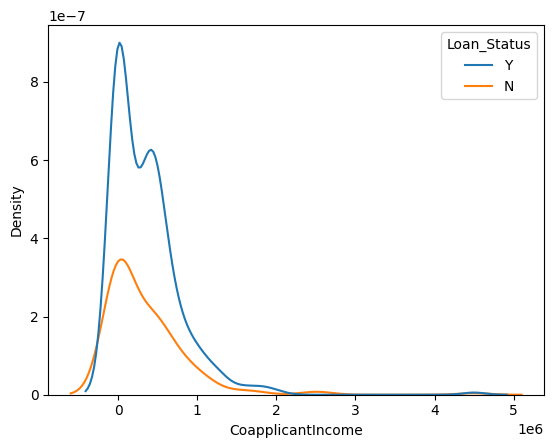

In [ ]:
sns.kdeplot(data=df_1, x="CoapplicantIncome", hue="Loan_Status")

<Axes: xlabel='Total_Income', ylabel='Density'>

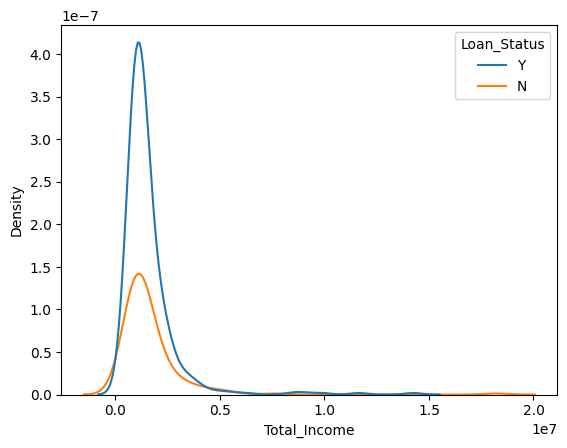

In [ ]:
sns.kdeplot(data=df_1, x="Total_Income", hue="Loan_Status")

<Axes: xlabel='LoanAmount', ylabel='Density'>

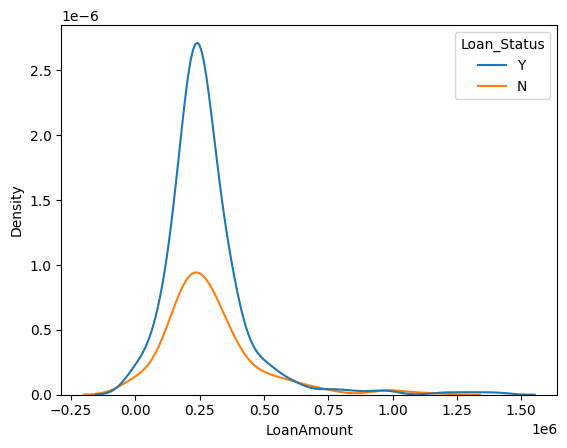

In [ ]:
sns.kdeplot(data=df_1, x="LoanAmount", hue="Loan_Status")

<Axes: xlabel='ratio', ylabel='Density'>

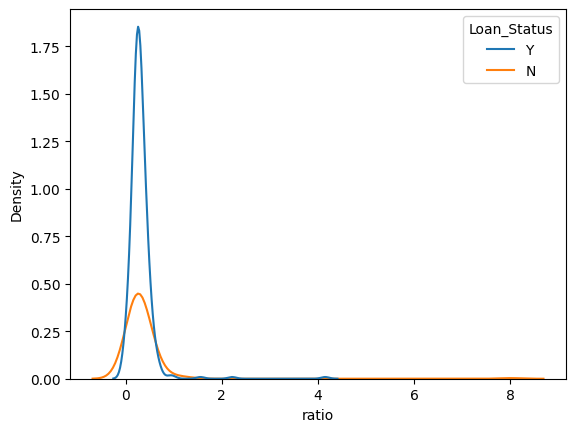

In [ ]:
sns.kdeplot(data=df_1, x="ratio", hue="Loan_Status")

<Axes: xlabel='loan_ratio', ylabel='Density'>

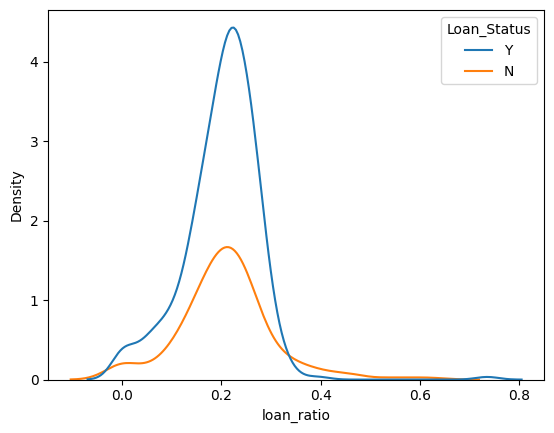

In [ ]:
sns.kdeplot(data=df_1, x="loan_ratio", hue="Loan_Status")

<Axes: xlabel='Loan_Amount_Term', ylabel='Density'>

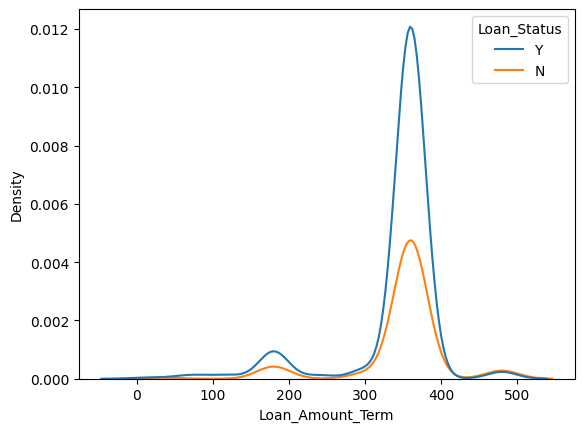

In [ ]:
sns.kdeplot(data=df_1, x="Loan_Amount_Term", hue="Loan_Status")

In [ ]:
import plotly.express as px
fig = px.scatter(df_1,y="ratio",x="Loan_Status",color='Loan_Status',symbol='Gender')
fig.show()

In [ ]:
fig = px.scatter(df_1,x="loan_ratio",y="Loan_Status",color='Loan_Status',symbol='Gender')
fig.show()

<ipython-input-94-1edb1987f387>:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



<Axes: >

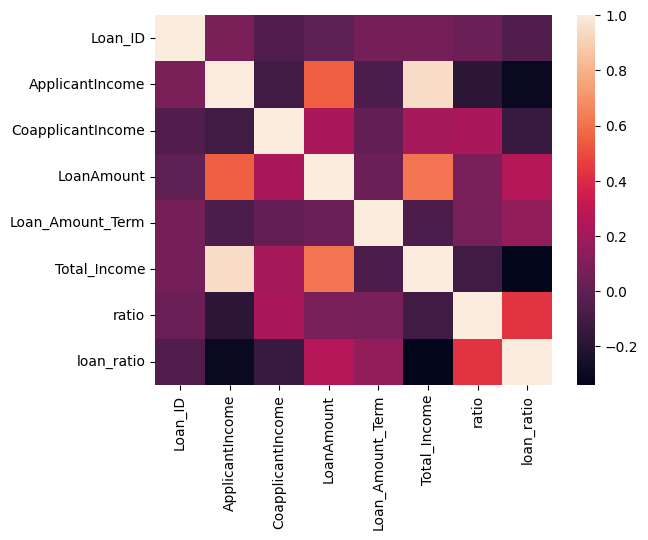

In [ ]:
sns.heatmap(df_1.corr())

In [ ]:
from scipy.stats import ttest_ind

yes = df[df_1['Loan_Status'] == 'Y']['loan_ratio']
no = df[df_1['Loan_Status'] == 'N']['loan_ratio']
t_stat, p_value = ttest_ind(yes,no)
print("T-test for Loan Ratio:")
print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")
if p_value < 0.05:
    print("There is a significant difference in Loan ratio between person who got loan approved and rejected.")
else:
    print("There is no significant difference in Loan ratio between person who got loan approved and rejected.")

T-test for Loan Ratio:
T-statistic: -1.1380208539805645
P-value: 0.2556368406321969
There is no significant difference in Loan ratio between person who got loan approved and rejected.


In [ ]:
yes = df[df_1['Loan_Status'] == 'Y']['ratio']
no = df[df_1['Loan_Status'] == 'N']['ratio']
t_stat, p_value = ttest_ind(yes,no)
print("T-test for Loan Ratio:")
print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")
if p_value < 0.05:
    print("There is a significant difference in Loan ratio between person who got loan approved and rejected.")
else:
    print("There is no significant difference in Loan ratio between person who got loan approved and rejected.")

T-test for Loan Ratio:
T-statistic: -0.9899279955772903
P-value: 0.32267059953685007
There is no significant difference in Loan ratio between person who got loan approved and rejected.


In [ ]:
df_1=df_1.drop(columns=['Loan_ID'])

In [ ]:
from sklearn.preprocessing import OneHotEncoder,LabelEncoder


# Encoding

In [ ]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status',
       'Total_Income', 'ratio', 'loan_ratio'],
      dtype='object')

In [ ]:
ohe=OneHotEncoder(sparse=False,drop='first')
gen=ohe.fit_transform(df_1[['Gender']])
ohe.get_feature_names_out()
df_1[ohe.get_feature_names_out()[0]]=gen

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning:

`sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.



In [ ]:
ohe=OneHotEncoder(sparse=False,drop='first')
mar=ohe.fit_transform(df_1[['Married']])
df_1[ohe.get_feature_names_out()[0]]=mar

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning:

`sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.



In [ ]:
ohe=OneHotEncoder(sparse=False,drop='first')
edu=ohe.fit_transform(df_1[['Education']])

df_1[ohe.get_feature_names_out()[0]]=edu

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning:

`sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.



In [ ]:
ohe=OneHotEncoder(sparse=False,drop='first')
se=ohe.fit_transform(df_1[['Self_Employed']])
df_1[ohe.get_feature_names_out()[0]]=se

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning:

`sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.



In [ ]:
ohe=OneHotEncoder(sparse=False,drop='first')
de=ohe.fit_transform(df_1[['Dependents']])
df_1[ohe.get_feature_names_out().tolist()]=de

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning:

`sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.



In [ ]:
ohe=OneHotEncoder(sparse=False,drop='first')
pa=ohe.fit_transform(df_1[['Property_Area']])
df_1[ohe.get_feature_names_out().tolist()]=pa


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning:

`sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.



In [ ]:
le=LabelEncoder()
stats=le.fit_transform(df_1['Loan_Status'])

In [ ]:
df_1['Status']=stats

In [ ]:
df_1=df_1.drop(columns=['Gender','Education','Self_Employed','Married','Loan_Status','Property_Area','Dependents'])

In [ ]:
df_1

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Total_Income,ratio,loan_ratio,Gender_Male,Married_Yes,Education_Not Graduate,Self_Employed_Yes,Dependents_1,Dependents_2,Dependents_3+,Property_Area_Semiurban,Property_Area_Urban,Status
0,1316025,0.0,250000,360.0,1.0,1316025.0,0.189966,0.189966,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
1,1031175,339300.0,256000,360.0,1.0,1370475.0,0.248260,0.186797,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0
2,675000,0.0,132000,360.0,1.0,675000.0,0.195556,0.195556,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1
3,581175,530550.0,240000,360.0,1.0,1111725.0,0.412957,0.215881,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1
4,1350000,0.0,282000,360.0,1.0,1350000.0,0.208889,0.208889,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
516,456975,367200.0,226000,480.0,1.0,824175.0,0.494557,0.274214,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1
517,691650,405000.0,246000,360.0,0.0,1096650.0,0.355671,0.224320,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0
518,1053675,430875.0,370000,360.0,1.0,1484550.0,0.351152,0.249234,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0
519,765000,0.0,190000,360.0,1.0,765000.0,0.248366,0.248366,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0


# Normalizing the data

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

df_scaled = scaler.fit_transform(df_1[['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term','Total_Income']].to_numpy())

In [ ]:
dataf = pd.DataFrame(df_scaled,columns=['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term','Total_Income'])

In [ ]:
df_1=df_1.drop(columns=['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term','Total_Income'])

In [ ]:
df_1 = pd.concat([df_1, dataf], axis = 1)

In [ ]:
df_1.head()

,Credit_History,ratio,loan_ratio,Gender_Male,Married_Yes,Education_Not Graduate,Self_Employed_Yes,Dependents_1,Dependents_2,Dependents_3+,Property_Area_Semiurban,Property_Area_Urban,Status,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Total_Income
0,1.0,0.189966,0.189966,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1,0.070489,0.0000,0.178571,0.74359,0.055394
1,1.0,0.248260,0.186797,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0,0.054830,0.0754,0.182857,0.74359,0.058435
2,1.0,0.195556,0.195556,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1,0.035250,0.0000,0.094286,0.74359,0.019583
3,1.0,0.412957,0.215881,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1,0.030093,0.1179,0.171429,0.74359,0.043980
4,1.0,0.208889,0.208889,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1,0.072356,0.0000,0.201429,0.74359,0.057292


<Axes: xlabel='ApplicantIncome', ylabel='Density'>

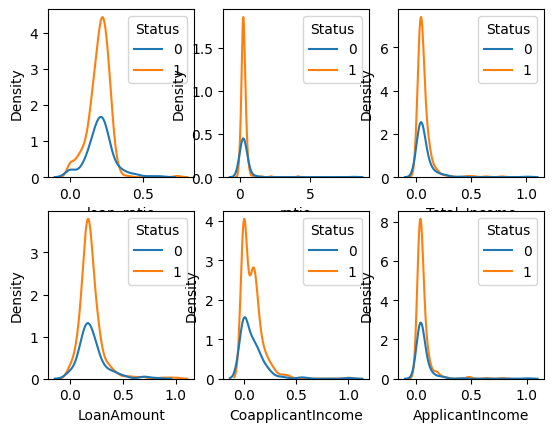

In [ ]:

plt.subplot(2, 3, 1)
sns.kdeplot(data=df_1, x="loan_ratio", hue="Status")

plt.subplot(2, 3, 2)
sns.kdeplot(data=df_1, x="ratio", hue="Status")

plt.subplot(2, 3, 3)
sns.kdeplot(data=df_1, x="Total_Income", hue="Status")

plt.subplot(2, 3, 4)
sns.kdeplot(data=df_1, x="LoanAmount", hue="Status")

plt.subplot(2, 3, 5)
sns.kdeplot(data=df_1, x="CoapplicantIncome", hue="Status")

plt.subplot(2, 3, 6)
sns.kdeplot(data=df_1, x="ApplicantIncome", hue="Status")



# Feature Selection

In [ ]:
get_summary(df_1)

The shape of data is :  (521, 18)


,Name,Data_Type,Missing,unique,per_missing
0,Credit_History,object,0,2,0.0
1,ratio,float64,0,500,0.0
2,loan_ratio,float64,0,501,0.0
3,Gender_Male,float64,0,2,0.0
4,Married_Yes,float64,0,2,0.0
5,Education_Not Graduate,float64,0,2,0.0
6,Self_Employed_Yes,float64,0,2,0.0
7,Dependents_1,float64,0,2,0.0
8,Dependents_2,float64,0,2,0.0
9,Dependents_3+,float64,0,2,0.0


<ipython-input-118-86b9a68c4796>:2: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



<Axes: >

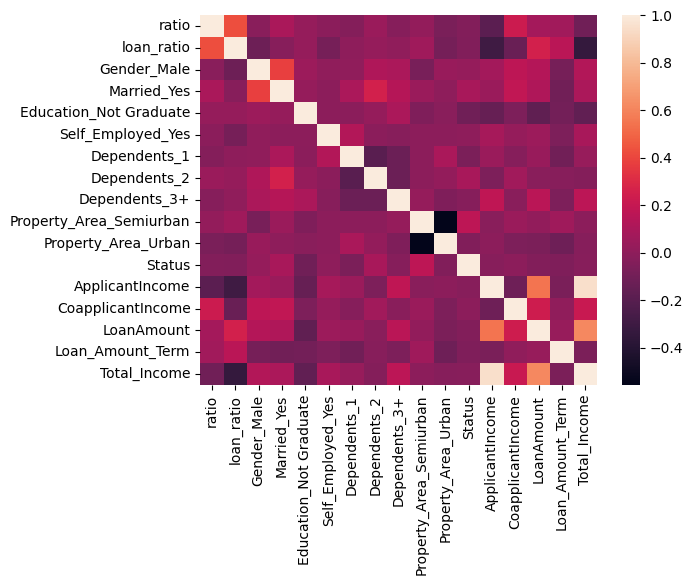

In [ ]:
# Correlation
sns.heatmap(df_1.corr())

In [ ]:
# Anova
# perform anova test between two variables.
import statsmodels.graphics.gofplots as sm
from scipy import stats
def perform_anova_test(x,y):
  # two variables of interest
  train_anova =df_1[[x,y]]
  groups=train_anova.groupby(x).count().reset_index()

  unique_majors =train_anova[x].unique()
  for major in unique_majors:
      stats.probplot(train_anova[train_anova[x] == major][y], dist="norm", plot=plt)
      plt.title("Probability Plot - " +  str(major))
      plt.show()


  # calculate ratio of the largest to the smallest sample standard deviation
  ratio =train_anova.groupby(x).std().max()/train_anova.groupby(x).std().min()
  print(ratio)


  # Create ANOVA backbone table
  data = [['Between Groups', '', '', '', '', '', ''], ['Within Groups', '', '', '', '', '', ''], ['Total', '', '', '', '', '', '']]
  anova_table = pd.DataFrame(data, columns = ['Source of Variation', 'SS', 'df', 'MS', 'F', 'P-value', 'F crit'])    #ss=sum of squares source, ms=mean sum of squares source
  anova_table.set_index('Source of Variation', inplace = True)

  # calculate SSTR and update anova table
  x_bar = train_anova[y].mean()
  SSTR = train_anova.groupby(x).count() * (train_anova.groupby(x).mean() - x_bar)**2
  anova_table['SS']['Between Groups'] = SSTR[y].sum()

  # calculate SSE and update anova table
  SSE = (train_anova.groupby(x).count() - 1) * train_anova.groupby(x).std()**2
  anova_table['SS']['Within Groups'] = SSE[y].sum()

  # calculate SSTR and update anova table
  SSTR = SSTR[y].sum() + SSE[y].sum()
  anova_table['SS']['Total'] = SSTR

  # update degree of freedom
  anova_table['df']['Between Groups'] = train_anova[x].nunique() - 1
  anova_table['df']['Within Groups'] = train_anova.shape[0] - train_anova[x].nunique()
  anova_table['df']['Total'] = train_anova.shape[0] - 1

  # calculate MS
  anova_table['MS'] = anova_table['SS'] / anova_table['df']

  # calculate F
  F = anova_table['MS']['Between Groups'] / anova_table['MS']['Within Groups']
  anova_table['F']['Between Groups'] = F

  # p-value
  anova_table['P-value']['Between Groups'] = 1 - stats.f.cdf(F, anova_table['df']['Between Groups'], anova_table['df']['Within Groups'])

  # F critical
  alpha = 0.05
  # possible types "right-tailed, left-tailed, two-tailed"
  tail_hypothesis_type = "two-tailed"
  if tail_hypothesis_type == "two-tailed":
      alpha /= 2
  anova_table['F crit']['Between Groups'] = stats.f.ppf(1-alpha, anova_table['df']['Between Groups'], anova_table['df']['Within Groups'])

  # Final ANOVA Table
  print(anova_table)


  # The p-value approach
  print("Approach 1: The p-value approach to hypothesis testing in the decision rule")
  conclusion = "Failed to reject the null hypothesis."
  if anova_table['P-value']['Between Groups'] <= alpha:
      conclusion = "Null Hypothesis is rejected."
  print("F-score is:", anova_table['F']['Between Groups'], " and p value is:", anova_table['P-value']['Between Groups'])
  print(conclusion)

  # The critical value approach
  print("\n--------------------------------------------------------------------------------------")
  print("Approach 2: The critical value approach to hypothesis testing in the decision rule")
  conclusion = "Failed to reject the null hypothesis."
  if anova_table['F']['Between Groups'] > anova_table['F crit']['Between Groups']:
      conclusion = "Null Hypothesis is rejected."
  print("F-score is:", anova_table['F']['Between Groups'], " and critical value is:", anova_table['F crit']['Between Groups'])
  print(conclusion)


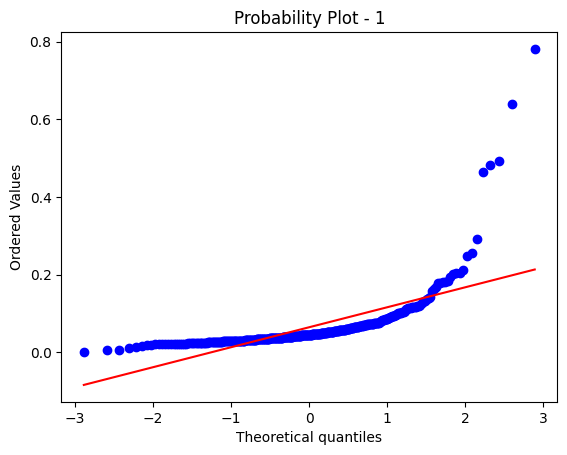

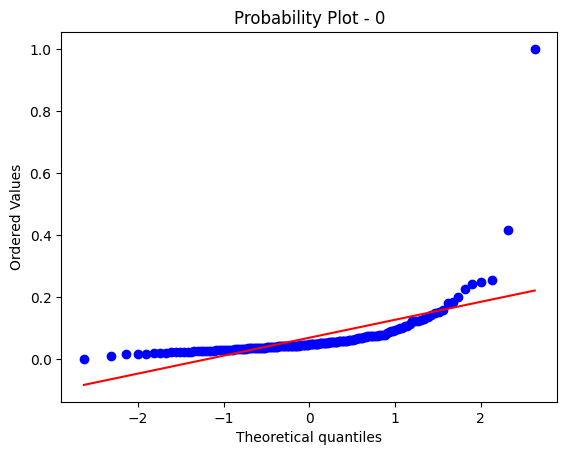

ApplicantIncome    1.217727
dtype: float64
                           SS   df        MS         F   P-value    F crit
Source of Variation                                                       
Between Groups       0.001639    1  0.001639  0.257698  0.611922  5.053166
Within Groups         3.30105  519   0.00636                              
Total                3.302689  520  0.006351                              
Approach 1: The p-value approach to hypothesis testing in the decision rule
F-score is: 0.2576979142391897  and p value is: 0.6119218009409317
Failed to reject the null hypothesis.

--------------------------------------------------------------------------------------
Approach 2: The critical value approach to hypothesis testing in the decision rule
F-score is: 0.2576979142391897  and critical value is: 5.053165746825162
Failed to reject the null hypothesis.


In [ ]:
perform_anova_test('Status','ApplicantIncome')

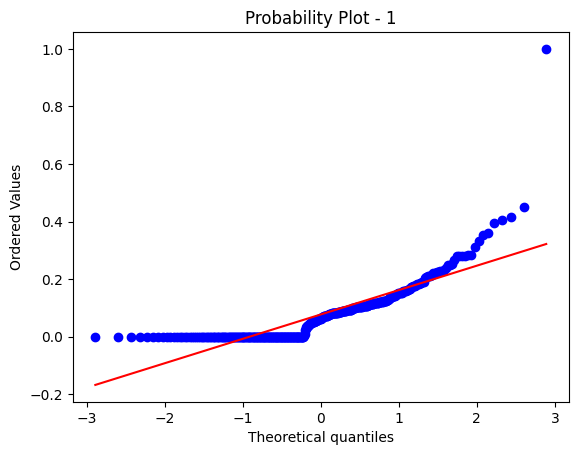

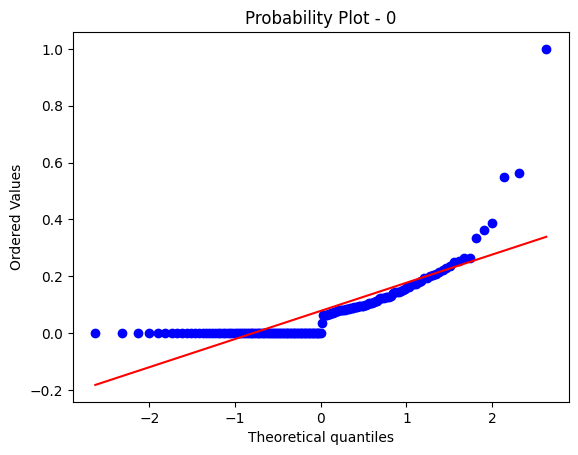

CoapplicantIncome    1.245504
dtype: float64
                           SS   df        MS         F   P-value    F crit
Source of Variation                                                       
Between Groups       0.000198    1  0.000198  0.017221  0.895645  5.053166
Within Groups        5.976293  519  0.011515                              
Total                5.976491  520  0.011493                              
Approach 1: The p-value approach to hypothesis testing in the decision rule
F-score is: 0.01722101010467652  and p value is: 0.895645129649483
Failed to reject the null hypothesis.

--------------------------------------------------------------------------------------
Approach 2: The critical value approach to hypothesis testing in the decision rule
F-score is: 0.01722101010467652  and critical value is: 5.053165746825162
Failed to reject the null hypothesis.


In [ ]:
perform_anova_test('Status','CoapplicantIncome')

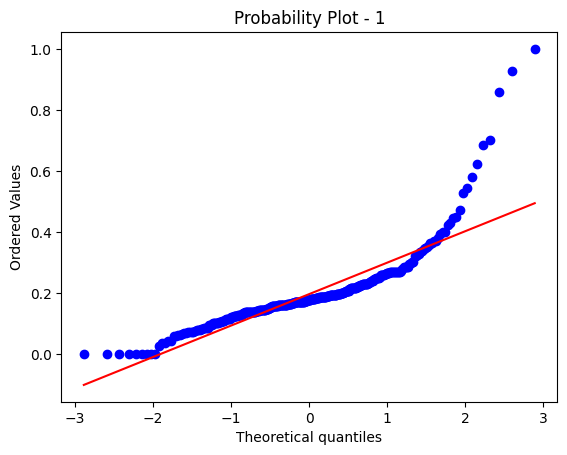

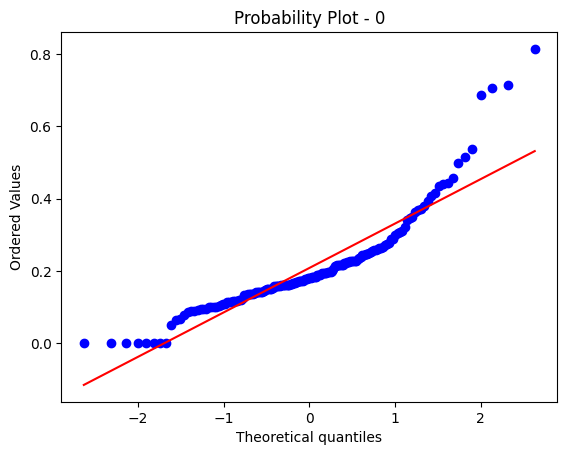

LoanAmount    1.122315
dtype: float64
                           SS   df        MS         F   P-value    F crit
Source of Variation                                                       
Between Groups       0.016035    1  0.016035  1.071797  0.301022  5.053166
Within Groups        7.764528  519  0.014961                              
Total                7.780562  520  0.014963                              
Approach 1: The p-value approach to hypothesis testing in the decision rule
F-score is: 1.071796978713158  and p value is: 0.30102203374061154
Failed to reject the null hypothesis.

--------------------------------------------------------------------------------------
Approach 2: The critical value approach to hypothesis testing in the decision rule
F-score is: 1.071796978713158  and critical value is: 5.053165746825162
Failed to reject the null hypothesis.


In [ ]:
perform_anova_test('Status','LoanAmount')

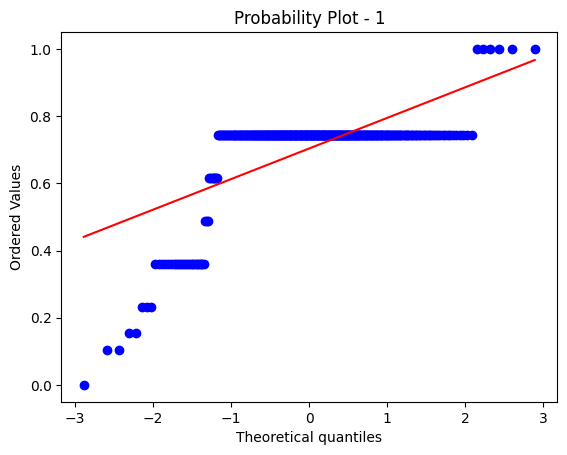

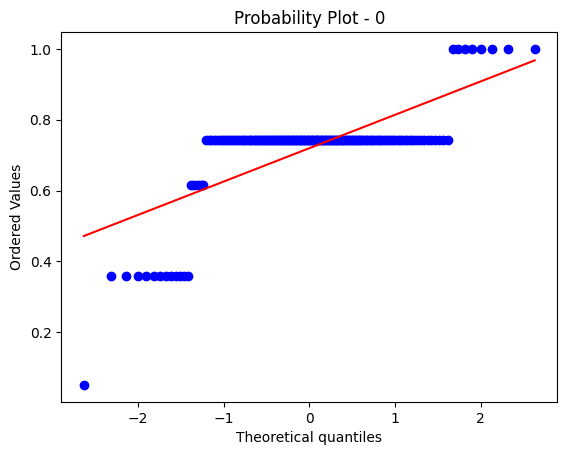

Loan_Amount_Term    1.037333
dtype: float64
                           SS   df        MS        F  P-value    F crit
Source of Variation                                                     
Between Groups       0.028103    1  0.028103  1.56218  0.21191  5.053166
Within Groups        9.336524  519  0.017989                            
Total                9.364627  520  0.018009                            
Approach 1: The p-value approach to hypothesis testing in the decision rule
F-score is: 1.5621798309622585  and p value is: 0.2119096376244094
Failed to reject the null hypothesis.

--------------------------------------------------------------------------------------
Approach 2: The critical value approach to hypothesis testing in the decision rule
F-score is: 1.5621798309622585  and critical value is: 5.053165746825162
Failed to reject the null hypothesis.


In [ ]:
perform_anova_test('Status','Loan_Amount_Term')

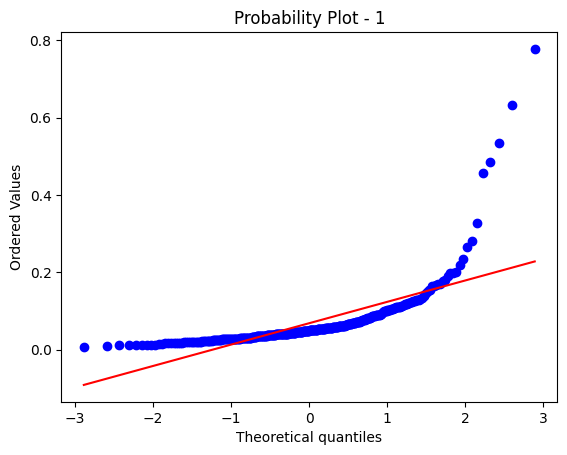

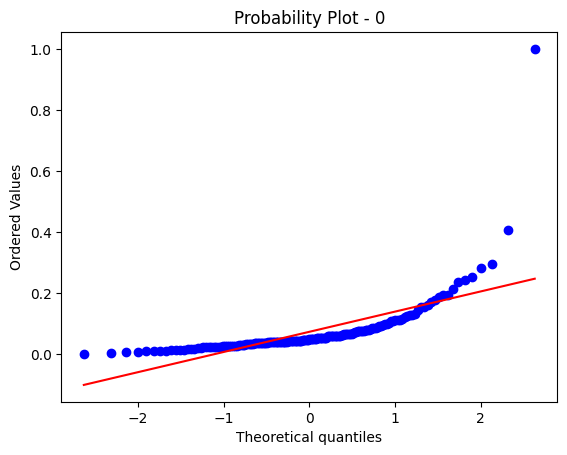

Total_Income    1.242788
dtype: float64
                           SS   df        MS         F   P-value    F crit
Source of Variation                                                       
Between Groups       0.001997    1  0.001997  0.293659  0.588118  5.053166
Within Groups        3.528629  519  0.006799                              
Total                3.530626  520   0.00679                              
Approach 1: The p-value approach to hypothesis testing in the decision rule
F-score is: 0.2936587853839499  and p value is: 0.5881179473523509
Failed to reject the null hypothesis.

--------------------------------------------------------------------------------------
Approach 2: The critical value approach to hypothesis testing in the decision rule
F-score is: 0.2936587853839499  and critical value is: 5.053165746825162
Failed to reject the null hypothesis.


In [ ]:
perform_anova_test('Status','Total_Income')

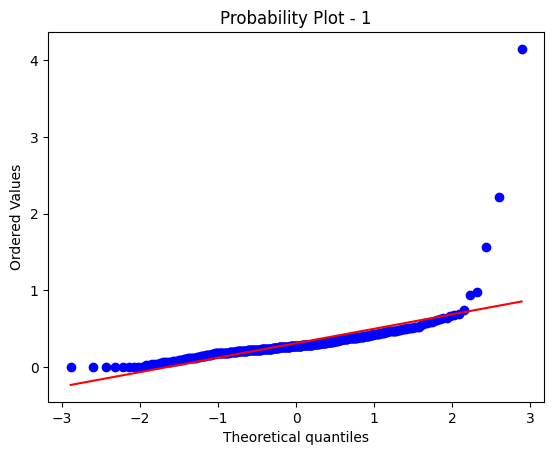

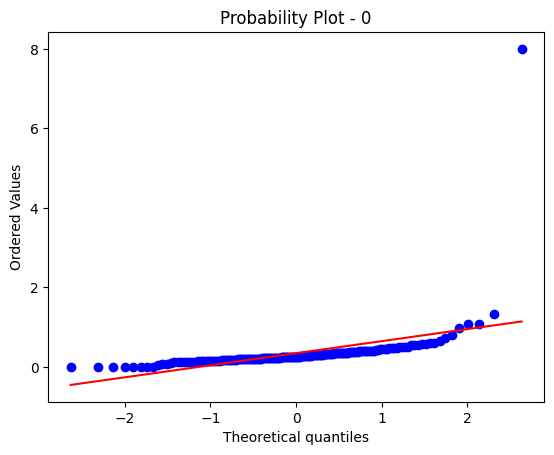

ratio    2.294434
dtype: float64
                            SS   df        MS         F   P-value    F crit
Source of Variation                                                        
Between Groups        0.174475    1  0.174475  0.979957  0.322671  5.053166
Within Groups        92.404753  519  0.178044                              
Total                92.579229  520  0.178037                              
Approach 1: The p-value approach to hypothesis testing in the decision rule
F-score is: 0.9799574364276691  and p value is: 0.32267059953679034
Failed to reject the null hypothesis.

--------------------------------------------------------------------------------------
Approach 2: The critical value approach to hypothesis testing in the decision rule
F-score is: 0.9799574364276691  and critical value is: 5.053165746825162
Failed to reject the null hypothesis.


In [ ]:
perform_anova_test('Status','ratio')

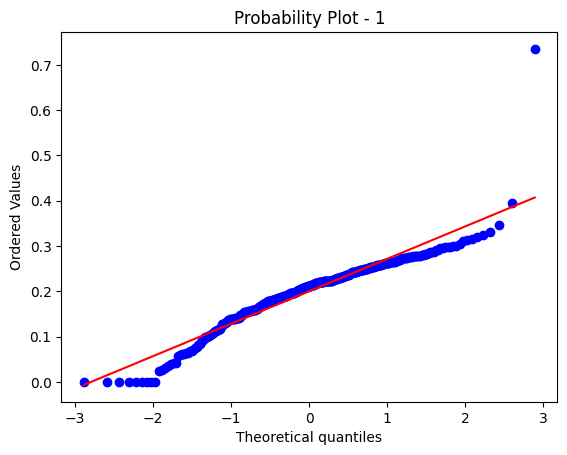

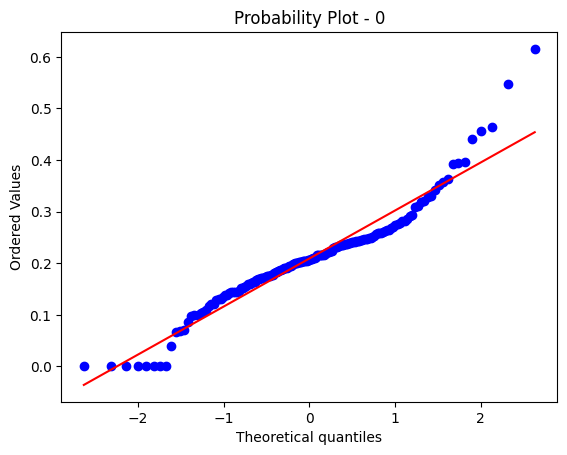

loan_ratio    1.27324
dtype: float64
                           SS   df        MS         F   P-value    F crit
Source of Variation                                                       
Between Groups       0.008669    1  0.008669  1.295091  0.255637  5.053166
Within Groups        3.474196  519  0.006694                              
Total                3.482865  520  0.006698                              
Approach 1: The p-value approach to hypothesis testing in the decision rule
F-score is: 1.2950914640946543  and p value is: 0.25563684063213055
Failed to reject the null hypothesis.

--------------------------------------------------------------------------------------
Approach 2: The critical value approach to hypothesis testing in the decision rule
F-score is: 1.2950914640946543  and critical value is: 5.053165746825162
Failed to reject the null hypothesis.


In [ ]:
perform_anova_test('Status','loan_ratio')

In [ ]:
# choosing the best 4 numerical columns
num=df_1[['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount','Loan_Amount_Term','Total_Income', 'ratio','loan_ratio']]
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import SelectKBest
sel=SelectKBest(f_classif,k=4).fit(num,df_1['Status'])


In [ ]:
num.columns[sel.get_support()]

Index(['LoanAmount', 'Loan_Amount_Term', 'ratio', 'loan_ratio'], dtype='object')

In [ ]:
anova_test=pd.DataFrame({'Features':sel.feature_names_in_,
                         'F_stats':sel.scores_,
                         'P-value':sel.pvalues_})

In [ ]:
anova_test

,Features,F_stats,P-value
0,ApplicantIncome,0.257698,0.611922
1,CoapplicantIncome,0.017221,0.895645
2,LoanAmount,1.071797,0.301022
3,Loan_Amount_Term,1.562180,0.211910
4,Total_Income,0.293659,0.588118
5,ratio,0.979957,0.322671
6,loan_ratio,1.295091,0.255637


In [ ]:
df_1.columns


Index(['Credit_History', 'ratio', 'loan_ratio', 'Gender_Male', 'Married_Yes',
       'Education_Not Graduate', 'Self_Employed_Yes', 'Dependents_1',
       'Dependents_2', 'Dependents_3+', 'Property_Area_Semiurban',
       'Property_Area_Urban', 'Status', 'ApplicantIncome', 'CoapplicantIncome',
       'LoanAmount', 'Loan_Amount_Term', 'Total_Income'],
      dtype='object')

In [ ]:
## Using Chi Square
score = []

for feature in df_1[['Dependents_1','Dependents_2', 'Dependents_3+','Gender_Male', 'Married_Yes','Education_Not Graduate',
       'Self_Employed_Yes', 'Property_Area_Semiurban', 'Property_Area_Urban']].columns:

    # create contingency table
    ct = pd.crosstab(df_1['Status'], df_1[feature])

    # chi_test
    p_value = chi2_contingency(ct)[1]
    score.append(p_value)

<Axes: >

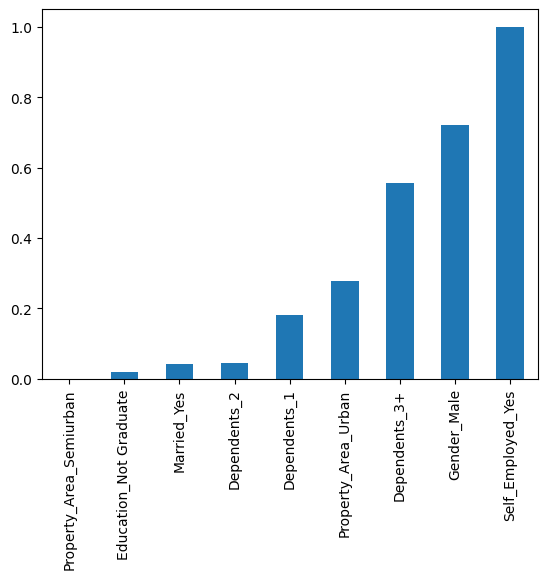

In [ ]:
pd.Series(score, index=df_1[['Dependents_1','Dependents_2', 'Dependents_3+','Gender_Male', 'Married_Yes','Education_Not Graduate',
       'Self_Employed_Yes', 'Property_Area_Semiurban', 'Property_Area_Urban']].columns).sort_values(ascending=True).plot(kind='bar')

In [ ]:
cat=df_1[['Dependents_1','Dependents_2', 'Dependents_3+','Gender_Male', 'Married_Yes','Education_Not Graduate',
       'Self_Employed_Yes', 'Property_Area_Semiurban', 'Property_Area_Urban']]
from sklearn.feature_selection import chi2
from sklearn.feature_selection import SelectKBest
sel=SelectKBest(chi2,k=4).fit(cat,df_1['Status'])


In [ ]:
chi_test=pd.DataFrame({'Features':sel.feature_names_in_,
                         'chi_stats':sel.scores_,
                         'P-value':sel.pvalues_})

In [ ]:
chi_test

,Features,chi_stats,P-value
0,Dependents_1,1.811685,0.178306
1,Dependents_2,3.796736,0.051353
2,Dependents_3+,0.535597,0.464263
3,Gender_Male,0.042281,0.837086
4,Married_Yes,1.589401,0.207412
5,Education_Not Graduate,4.666242,0.030761
6,Self_Employed_Yes,0.000102,0.991930
7,Property_Area_Semiurban,9.101846,0.002554
8,Property_Area_Urban,0.931486,0.334477


In [ ]:
cat.columns[sel.get_support()]

Index(['Dependents_1', 'Dependents_2', 'Education_Not Graduate',
       'Property_Area_Semiurban'],
      dtype='object')

# WRAPPER METHODS

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(df_1.loc[:, df_1.columns != 'Status'],df_1['Status'],test_size=0.2,random_state=42)

In [ ]:

x_train.head()

,Credit_History,ratio,loan_ratio,Gender_Male,Married_Yes,Education_Not Graduate,Self_Employed_Yes,Dependents_1,Dependents_2,Dependents_3+,Property_Area_Semiurban,Property_Area_Urban,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Total_Income
517,0.0,0.355671,0.224320,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.036166,0.090,0.175714,0.743590,0.043138
177,0.0,0.797679,0.261656,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.066370,0.565,0.707143,0.743590,0.193243
432,1.0,0.279590,0.279590,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.157403,0.000,0.578571,0.743590,0.143719
333,1.0,0.068768,0.068768,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.781534,0.000,0.700000,0.358974,0.777986
412,0.0,0.317877,0.317877,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.073544,0.000,0.311429,0.743590,0.058498


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,f1_score
from sklearn.model_selection import cross_val_score
from mlxtend.feature_selection import SequentialFeatureSelector as SFS

In [ ]:
model = LogisticRegression()

print("training",np.mean(cross_val_score(model, x_train, y_train, cv=5, scoring='f1')))
print("testing",np.mean(cross_val_score(model, x_test, y_test, cv=5, scoring='f1')))

training 0.8708812914182704
testing 0.8621811271783464


In [ ]:

lr = LogisticRegression()

# perform backward elimination
sfs = SFS(lr, k_features='best', forward=False, floating=False, scoring='f1',cv=5)

sfs.fit(x_train, y_train)

SequentialFeatureSelector(estimator=LogisticRegression(), forward=False,
                          k_features=(1, 17), scoring='f1')

In [ ]:
sfs.k_feature_idx_

(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 15, 16)

In [ ]:
metric_df = pd.DataFrame.from_dict(sfs.get_metric_dict()).T

In [ ]:
metric_df

,feature_idx,cv_scores,avg_score,feature_names,ci_bound,std_dev,std_err
17,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[0.8837209302325583, 0.890625, 0.8358208955223...",0.870881,"(Credit_History, ratio, loan_ratio, Gender_Mal...",0.027178,0.021145,0.010573
16,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[0.8837209302325583, 0.890625, 0.8358208955223...",0.872587,"(Credit_History, ratio, loan_ratio, Gender_Mal...",0.026085,0.020295,0.010148
15,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[0.8837209302325583, 0.890625, 0.8358208955223...",0.872587,"(Credit_History, ratio, loan_ratio, Gender_Mal...",0.026085,0.020295,0.010148
14,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13)","[0.8837209302325583, 0.890625, 0.8358208955223...",0.872587,"(Credit_History, ratio, loan_ratio, Gender_Mal...",0.026085,0.020295,0.010148
13,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12)","[0.8837209302325583, 0.890625, 0.8358208955223...",0.872587,"(Credit_History, ratio, loan_ratio, Gender_Mal...",0.026085,0.020295,0.010148
12,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11)","[0.8837209302325583, 0.890625, 0.8358208955223...",0.872587,"(Credit_History, ratio, loan_ratio, Gender_Mal...",0.026085,0.020295,0.010148
11,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10)","[0.8837209302325583, 0.890625, 0.8358208955223...",0.872587,"(Credit_History, ratio, loan_ratio, Gender_Mal...",0.026085,0.020295,0.010148
10,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9)","[0.8837209302325583, 0.890625, 0.8358208955223...",0.872587,"(Credit_History, ratio, loan_ratio, Gender_Mal...",0.026085,0.020295,0.010148
9,"(0, 1, 2, 3, 4, 5, 6, 7, 8)","[0.8837209302325583, 0.890625, 0.8358208955223...",0.872587,"(Credit_History, ratio, loan_ratio, Gender_Mal...",0.026085,0.020295,0.010148
8,"(0, 1, 2, 3, 4, 5, 6, 7)","[0.8837209302325583, 0.890625, 0.8358208955223...",0.872587,"(Credit_History, ratio, loan_ratio, Gender_Mal...",0.026085,0.020295,0.010148


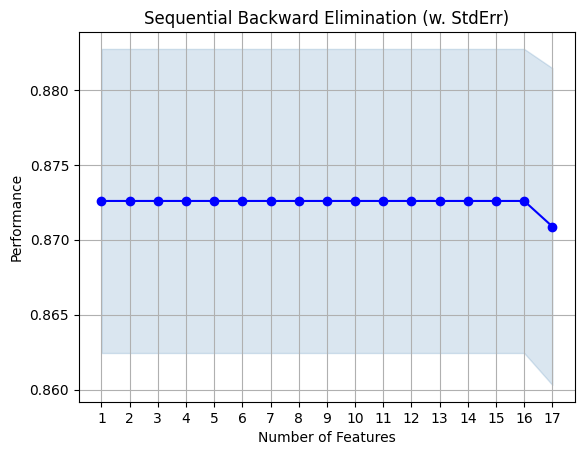

In [ ]:
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs


fig1 = plot_sfs(sfs.get_metric_dict(), kind='std_err',)

plt.title('Sequential Backward Elimination (w. StdErr)')
plt.grid()
plt.show()

In [ ]:
from sklearn.feature_selection import SequentialFeatureSelector as SFS


sfs2 = SFS(model,
           n_features_to_select=10,
           direction='backward',
           scoring='f1',
           n_jobs=-1,
           cv=5)

sfs2 = sfs2.fit(x_train, y_train)

In [ ]:
x_train.columns

Index(['Credit_History', 'ratio', 'loan_ratio', 'Gender_Male', 'Married_Yes',
       'Education_Not Graduate', 'Self_Employed_Yes', 'Dependents_1',
       'Dependents_2', 'Dependents_3+', 'Property_Area_Semiurban',
       'Property_Area_Urban', 'ApplicantIncome', 'CoapplicantIncome',
       'LoanAmount', 'Loan_Amount_Term', 'Total_Income'],
      dtype='object')

In [ ]:
x_train.columns[sfs2.support_]

Index(['Credit_History', 'Dependents_2', 'Dependents_3+',
       'Property_Area_Semiurban', 'Property_Area_Urban', 'ApplicantIncome',
       'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Total_Income'],
      dtype='object')

In [ ]:
model = LogisticRegression()

print("training",np.mean(cross_val_score(model, x_train[x_train.columns[sfs2.support_]], y_train, cv=5, scoring='f1')))
print("testing",np.mean(cross_val_score(model, x_test[x_test.columns[sfs2.support_]], y_test, cv=5, scoring='f1')))

training 0.8725870483479079
testing 0.880404807084124


#Embedded Technique

In [ ]:
from pandas.core.common import random_state
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

dt = DecisionTreeClassifier()
rf = RandomForestClassifier()


rf.fit(x_train,y_train)

RandomForestClassifier()

In [ ]:
rf.feature_importances_

array([0.2063302 , 0.09917619, 0.14058001, 0.01129651, 0.02008013,
       0.01634223, 0.01085081, 0.01288676, 0.01160158, 0.01064493,
       0.02510977, 0.01740168, 0.10158675, 0.06307114, 0.10791868,
       0.02694012, 0.11818249])

<Axes: >

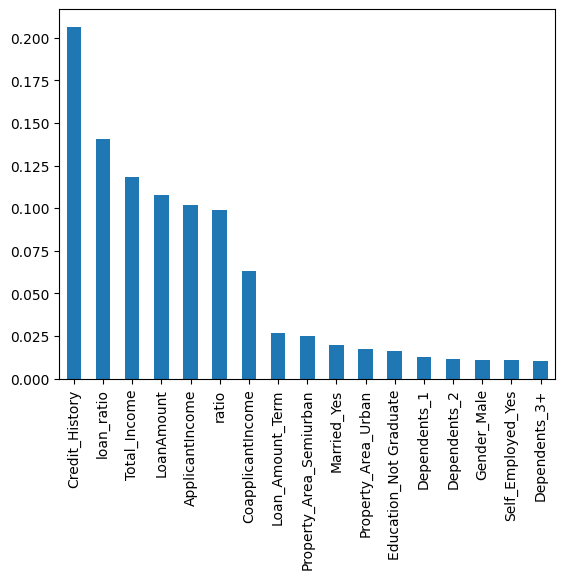

In [ ]:
x = pd.Series(np.abs(rf.feature_importances_),index=x_train.columns)

x.sort_values(ascending=False).plot(kind='bar')

In [ ]:
dt.fit(x_train,y_train)

DecisionTreeClassifier()

<Axes: >

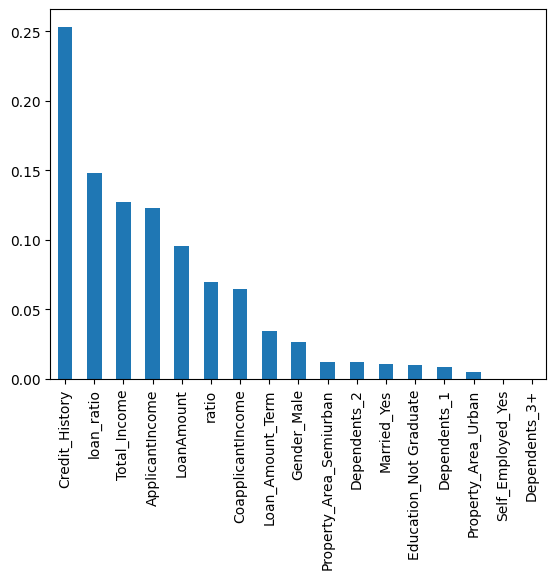

In [ ]:
x = pd.Series(np.abs(dt.feature_importances_),index=x_train.columns)

x.sort_values(ascending=False).plot(kind='bar')

#Modelling The Data

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report



In [ ]:
knn_r_acc = []
for i in range(1,17,1):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train[['Credit_History', 'Dependents_2', 'Dependents_3+','Property_Area_Semiurban', 'Property_Area_Urban', 'ApplicantIncome',
       'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Total_Income']],y_train)
    test_score =accuracy_score(y_test,knn.predict(x_test[['Credit_History', 'Dependents_2', 'Dependents_3+','Property_Area_Semiurban', 'Property_Area_Urban', 'ApplicantIncome',
       'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Total_Income']]))
    train_score =accuracy_score(y_train,knn.predict(x_train[['Credit_History', 'Dependents_2', 'Dependents_3+','Property_Area_Semiurban', 'Property_Area_Urban', 'ApplicantIncome',
       'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Total_Income']]))
    knn_r_acc.append((i, test_score ,train_score))
df = pd.DataFrame(knn_r_acc, columns=['K','Test Score','Train Score'])
print(df)

     K  Test Score  Train Score
0    1    0.685714     1.000000
1    2    0.638095     0.836538
2    3    0.780952     0.841346
3    4    0.733333     0.841346
4    5    0.809524     0.826923
5    6    0.780952     0.819712
6    7    0.780952     0.805288
7    8    0.790476     0.812500
8    9    0.809524     0.807692
9   10    0.800000     0.810096
10  11    0.809524     0.802885
11  12    0.809524     0.805288
12  13    0.800000     0.807692
13  14    0.800000     0.807692
14  15    0.790476     0.800481
15  16    0.800000     0.800481


Text(0, 0.5, 'Testing Accuracy')

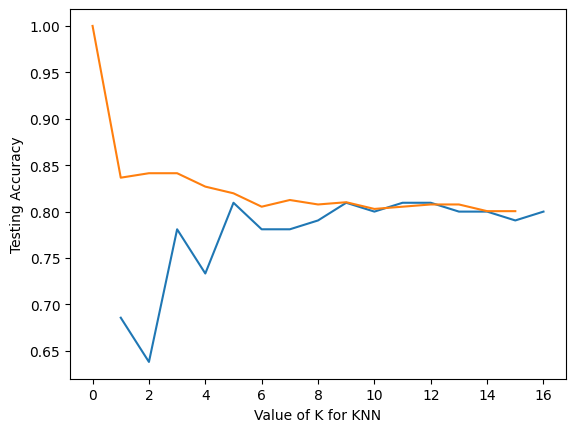

In [ ]:
import matplotlib.pyplot as plt
plt.plot(df['K'], df['Test Score'],df['Train Score'])
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')

In [ ]:
knn = KNeighborsClassifier(n_neighbors=9)
knn.fit(x_train[['Credit_History', 'Dependents_2', 'Dependents_3+','Property_Area_Semiurban', 'Property_Area_Urban', 'ApplicantIncome',
       'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Total_Income']],y_train)
# accuracy score, confusion matrix and classification report of knn

knn_acc_test = accuracy_score(y_test,knn.predict(x_test[['Credit_History', 'Dependents_2', 'Dependents_3+','Property_Area_Semiurban', 'Property_Area_Urban', 'ApplicantIncome',
       'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Total_Income']]))
knn_acc_train=accuracy_score(y_train,knn.predict(x_train[['Credit_History', 'Dependents_2', 'Dependents_3+','Property_Area_Semiurban', 'Property_Area_Urban', 'ApplicantIncome',
       'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Total_Income']]))
print("The Training Accuracy of KNN is ",accuracy_score(y_train,knn.predict(x_train[['Credit_History', 'Dependents_2', 'Dependents_3+','Property_Area_Semiurban', 'Property_Area_Urban', 'ApplicantIncome',
       'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Total_Income']])))
print("The Testing Accuracy of KNN is",knn_acc_test)

print(" Confusion Matrix: \n",confusion_matrix(y_test,knn.predict(x_test[['Credit_History', 'Dependents_2', 'Dependents_3+','Property_Area_Semiurban', 'Property_Area_Urban', 'ApplicantIncome',
       'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Total_Income']])))
cm=classification_report(y_test,knn.predict(x_test[['Credit_History', 'Dependents_2', 'Dependents_3+','Property_Area_Semiurban', 'Property_Area_Urban', 'ApplicantIncome',
       'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Total_Income']]))

print(" Classification Report: \n",classification_report(y_test,knn.predict(x_test[['Credit_History', 'Dependents_2', 'Dependents_3+','Property_Area_Semiurban', 'Property_Area_Urban', 'ApplicantIncome',
       'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Total_Income']])))


The Training Accuracy of KNN is  0.8076923076923077
The Testing Accuracy of KNN is 0.8095238095238095
 Confusion Matrix: 
 [[16 20]
 [ 0 69]]
 Classification Report: 
               precision    recall  f1-score   support

           0       1.00      0.44      0.62        36
           1       0.78      1.00      0.87        69

    accuracy                           0.81       105
   macro avg       0.89      0.72      0.74       105
weighted avg       0.85      0.81      0.78       105



In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score
precision_knn = precision_score(y_test,knn.predict(x_test[['Credit_History', 'Dependents_2', 'Dependents_3+','Property_Area_Semiurban', 'Property_Area_Urban', 'ApplicantIncome',
       'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Total_Income']]))
recall_knn = recall_score(y_test, knn.predict(x_test[['Credit_History', 'Dependents_2', 'Dependents_3+','Property_Area_Semiurban', 'Property_Area_Urban', 'ApplicantIncome',
       'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Total_Income']]))
f1_score_knn = f1_score(y_test, knn.predict(x_test[['Credit_History', 'Dependents_2', 'Dependents_3+','Property_Area_Semiurban', 'Property_Area_Urban', 'ApplicantIncome',
       'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Total_Income']]))

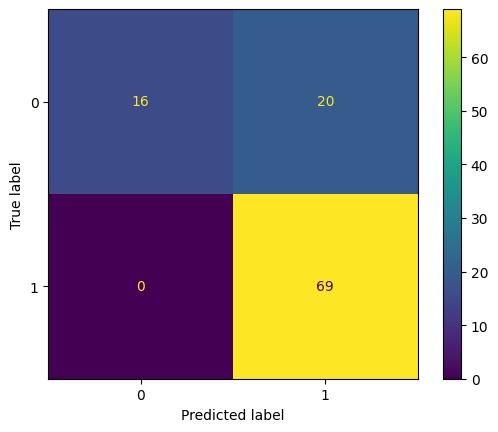

In [ ]:
 from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
 disp=ConfusionMatrixDisplay(confusion_matrix(y_test,knn.predict(x_test[['Credit_History', 'Dependents_2', 'Dependents_3+','Property_Area_Semiurban', 'Property_Area_Urban', 'ApplicantIncome',
       'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Total_Income']])))
 disp.plot()

In [ ]:
# import DecisionTreeClassifer
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier()

dtc.fit(x_train[['Credit_History', 'Dependents_2', 'Dependents_3+','Property_Area_Semiurban', 'Property_Area_Urban', 'ApplicantIncome',
       'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Total_Income']],y_train)


dtc_acc_test = accuracy_score(y_test,dtc.predict(x_test[['Credit_History', 'Dependents_2', 'Dependents_3+','Property_Area_Semiurban', 'Property_Area_Urban', 'ApplicantIncome',
       'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Total_Income']]))
dtc_acc_train=accuracy_score(y_train,dtc.predict(x_train[['Credit_History', 'Dependents_2', 'Dependents_3+','Property_Area_Semiurban', 'Property_Area_Urban', 'ApplicantIncome',
       'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Total_Income']]))
print("The Training Accuracy is ",accuracy_score(y_train,dtc.predict(x_train[['Credit_History', 'Dependents_2', 'Dependents_3+','Property_Area_Semiurban', 'Property_Area_Urban', 'ApplicantIncome',
       'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Total_Income']])))
print("The Testing Accuracy is",dtc_acc_test)

print(" Confusion Matrix: \n",confusion_matrix(y_test,dtc.predict(x_test[['Credit_History', 'Dependents_2', 'Dependents_3+','Property_Area_Semiurban', 'Property_Area_Urban', 'ApplicantIncome',
       'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Total_Income']])))


print(" Classification Report:\n ",classification_report(y_test,dtc.predict(x_test[['Credit_History', 'Dependents_2', 'Dependents_3+','Property_Area_Semiurban', 'Property_Area_Urban', 'ApplicantIncome',
       'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Total_Income']])))



The Training Accuracy is  1.0
The Testing Accuracy is 0.6761904761904762
 Confusion Matrix: 
 [[16 20]
 [14 55]]
 Classification Report:
                precision    recall  f1-score   support

           0       0.53      0.44      0.48        36
           1       0.73      0.80      0.76        69

    accuracy                           0.68       105
   macro avg       0.63      0.62      0.62       105
weighted avg       0.66      0.68      0.67       105



In [ ]:
pip install graphviz

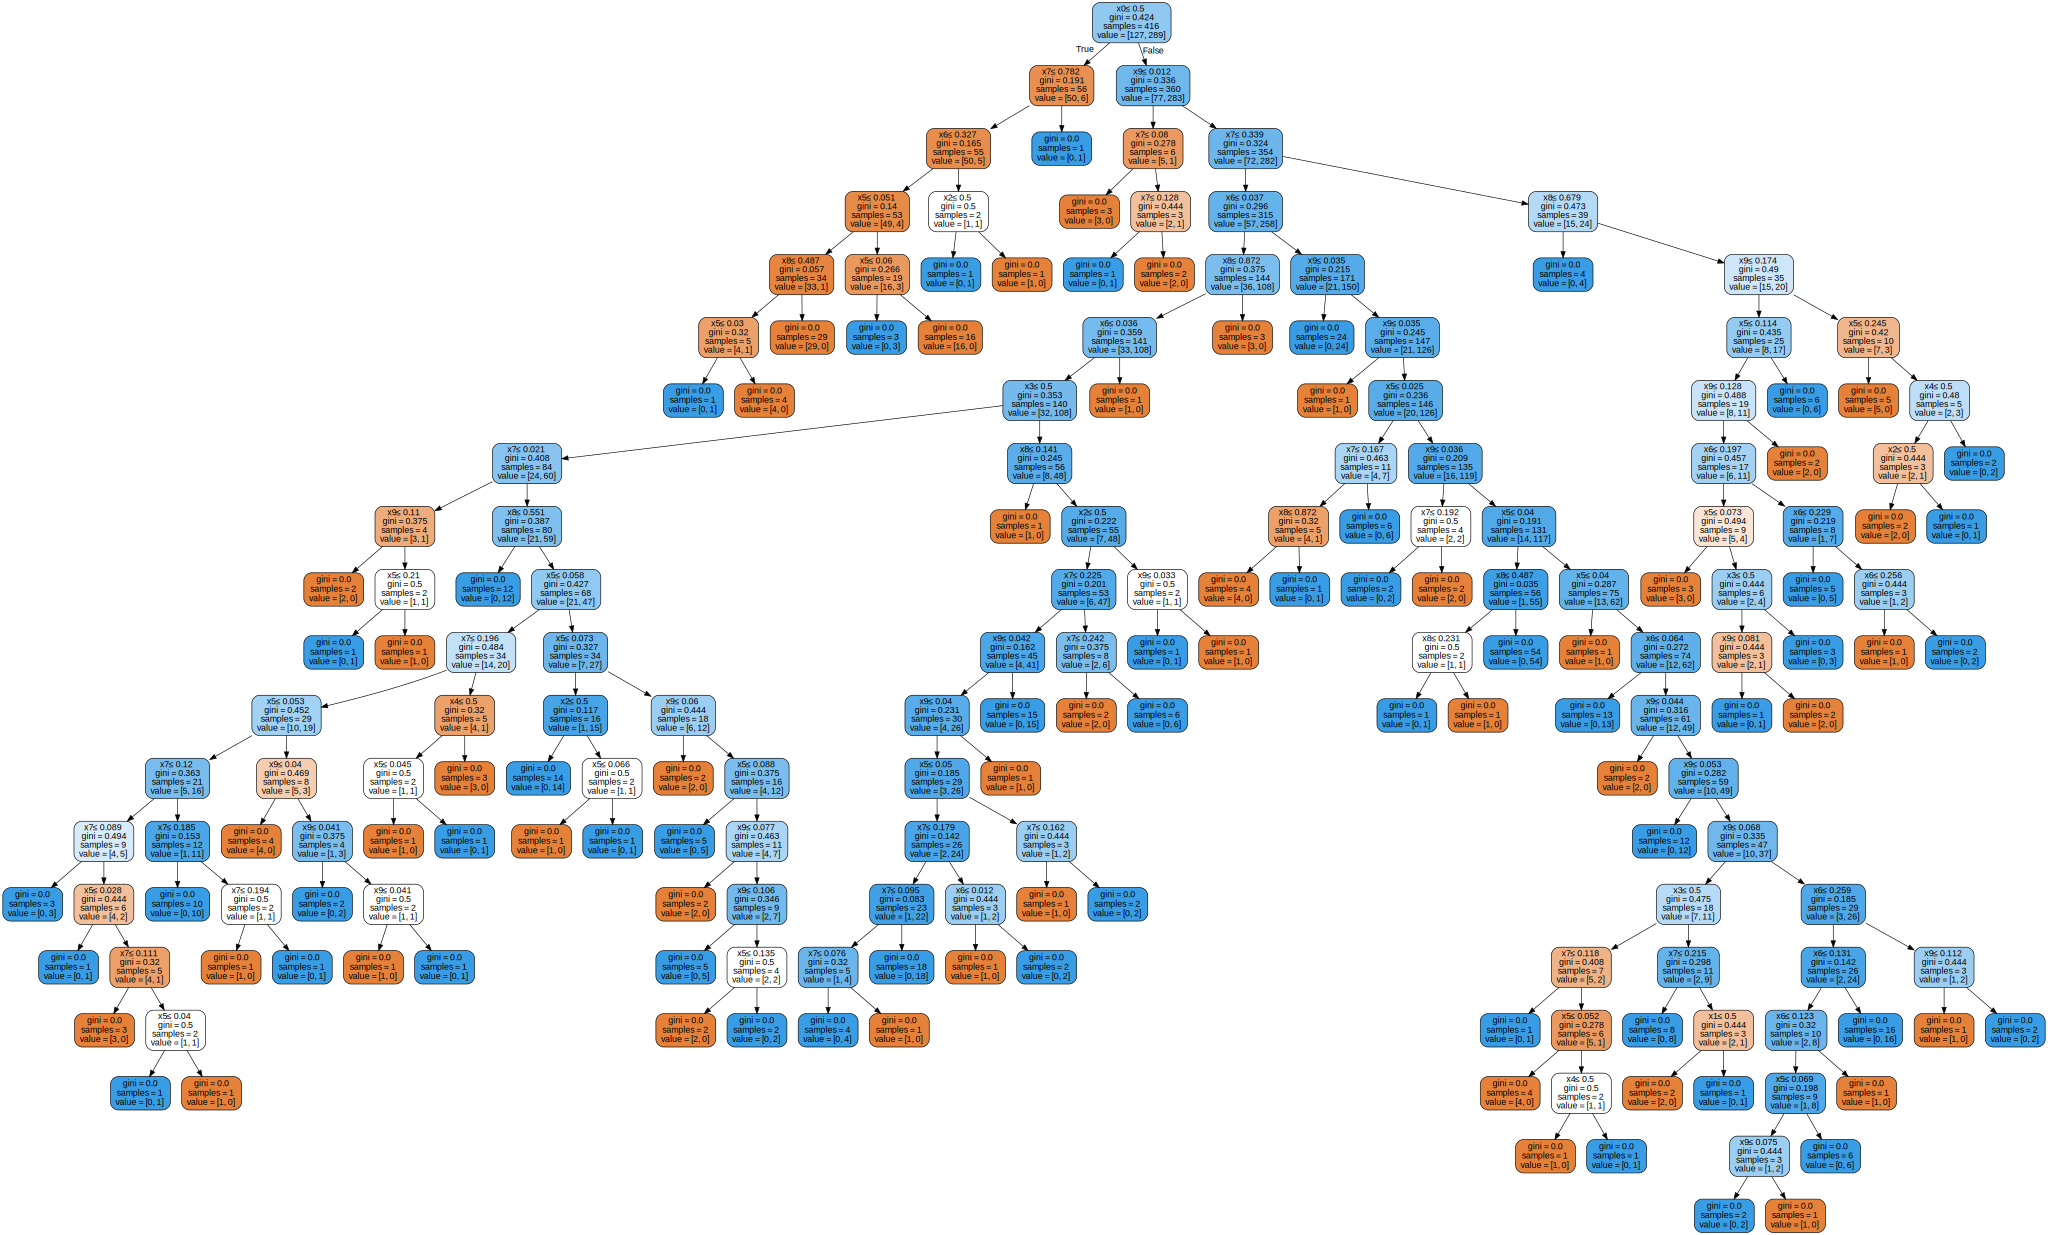

In [ ]:
import graphviz
from sklearn import tree
dot_data = tree.export_graphviz(dtc, out_file=None,

                      filled=True, rounded=True,
                      special_characters=True)
graph = graphviz.Source(dot_data)
graph

In [ ]:
from sklearn.model_selection import GridSearchCV

p= {
    'criterion' : ['gini', 'entropy'],
    'max_depth' : [3, 5, 7, 10],
    'splitter' : ['best', 'random'],
    'min_samples_leaf' : [1, 2, 3, 5, 7],
    'min_samples_split' : [1, 2, 3, 5, 7],
    'max_features' : ['auto', 'sqrt', 'log2']
}
grid_search_dtc = GridSearchCV(dtc,p,cv=5,n_jobs=-1,verbose=1)
grid_search_dtc.fit(x_train[['Credit_History', 'Dependents_2', 'Dependents_3+','Property_Area_Semiurban', 'Property_Area_Urban', 'ApplicantIncome',
       'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Total_Income']],y_train)


Fitting 5 folds for each of 1200 candidates, totalling 6000 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning:


1200 fits failed out of a total of 6000.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1200 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py", line 889, in fit
    super().fit(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py", line 177, in fit
    self._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 600, in _

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 7, 10],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 3, 5, 7],
                         'min_samples_split': [1, 2, 3, 5, 7],
                         'splitter': ['best', 'random']},
             verbose=1)

In [ ]:
print(grid_search_dtc.best_params_)
print(grid_search_dtc.best_score_)

{'criterion': 'entropy', 'max_depth': 7, 'max_features': 'auto', 'min_samples_leaf': 3, 'min_samples_split': 7, 'splitter': 'random'}
0.8148881239242683


In [ ]:
dtc=grid_search_dtc.best_estimator_
dtc_acc_test = accuracy_score(y_test,dtc.predict(x_test[['Credit_History', 'Dependents_2', 'Dependents_3+','Property_Area_Semiurban', 'Property_Area_Urban', 'ApplicantIncome',
       'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Total_Income']]))
dtc_acc_train=accuracy_score(y_train,dtc.predict(x_train[['Credit_History', 'Dependents_2', 'Dependents_3+','Property_Area_Semiurban', 'Property_Area_Urban', 'ApplicantIncome',
       'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Total_Income']]))
print("The Training Accuracy is ",accuracy_score(y_train,dtc.predict(x_train[['Credit_History', 'Dependents_2', 'Dependents_3+','Property_Area_Semiurban', 'Property_Area_Urban', 'ApplicantIncome',
       'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Total_Income']])))
print("The Testing Accuracy is",dtc_acc_test)

print(" Confusion Matrix: \n",confusion_matrix(y_test,dtc.predict(x_test[['Credit_History', 'Dependents_2', 'Dependents_3+','Property_Area_Semiurban', 'Property_Area_Urban', 'ApplicantIncome',
       'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Total_Income']])))


print(" Classification Report:\n ",classification_report(y_test,dtc.predict(x_test[['Credit_History', 'Dependents_2', 'Dependents_3+','Property_Area_Semiurban', 'Property_Area_Urban', 'ApplicantIncome',
       'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Total_Income']])))


The Training Accuracy is  0.7980769230769231
The Testing Accuracy is 0.7428571428571429
 Confusion Matrix: 
 [[ 9 27]
 [ 0 69]]
 Classification Report:
                precision    recall  f1-score   support

           0       1.00      0.25      0.40        36
           1       0.72      1.00      0.84        69

    accuracy                           0.74       105
   macro avg       0.86      0.62      0.62       105
weighted avg       0.82      0.74      0.69       105



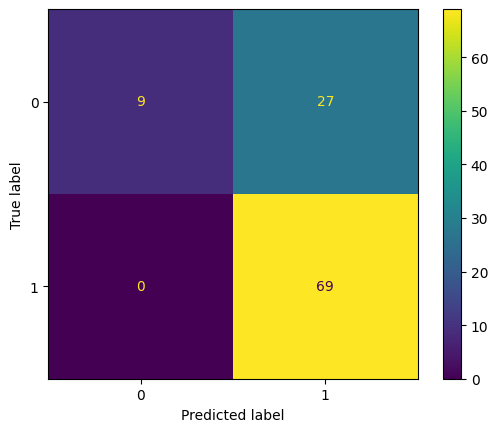

In [ ]:
 from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
 disp=ConfusionMatrixDisplay(confusion_matrix(y_test,dtc.predict(x_test[['Credit_History', 'Dependents_2', 'Dependents_3+','Property_Area_Semiurban', 'Property_Area_Urban', 'ApplicantIncome',
       'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Total_Income']])))
 disp.plot()

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score
precision_dtc = precision_score(y_test,dtc.predict(x_test[['Credit_History', 'Dependents_2', 'Dependents_3+','Property_Area_Semiurban', 'Property_Area_Urban', 'ApplicantIncome',
       'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Total_Income']]))
recall_dtc= recall_score(y_test, dtc.predict(x_test[['Credit_History', 'Dependents_2', 'Dependents_3+','Property_Area_Semiurban', 'Property_Area_Urban', 'ApplicantIncome',
       'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Total_Income']]))
f1_score_dtc = f1_score(y_test, dtc.predict(x_test[['Credit_History', 'Dependents_2', 'Dependents_3+','Property_Area_Semiurban', 'Property_Area_Urban', 'ApplicantIncome',
       'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Total_Income']]))

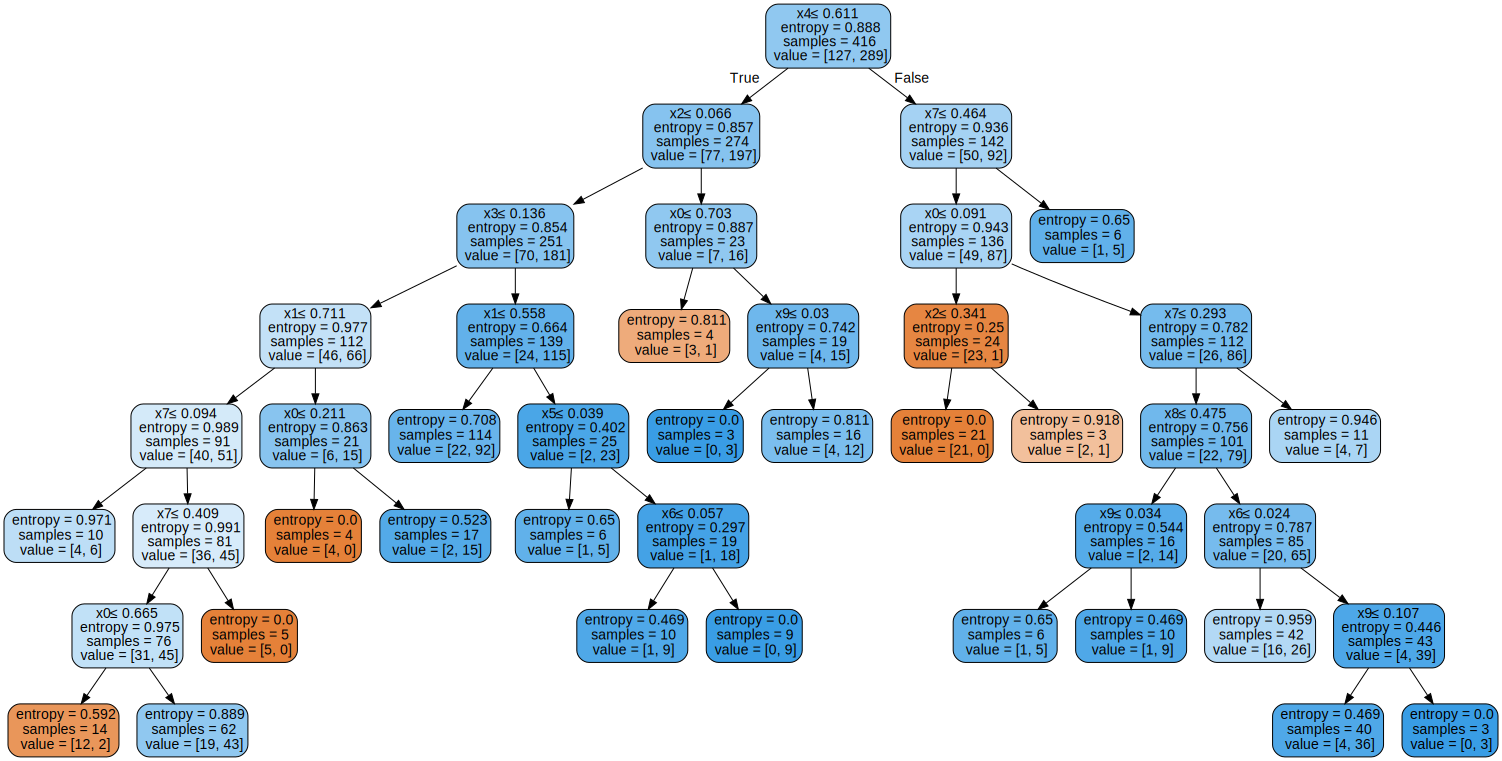

In [ ]:

dot_data = tree.export_graphviz(dtc, out_file=None,

                      filled=True, rounded=True,
                      special_characters=True)
graph = graphviz.Source(dot_data)
graph

In [ ]:
# import RandomForestClassifier

from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(criterion='entropy',n_estimators=100, max_depth=11, min_samples_split=3, min_samples_leaf=2)
rf_clf.fit(x_train[['Credit_History', 'Dependents_2', 'Dependents_3+','Property_Area_Semiurban', 'Property_Area_Urban', 'ApplicantIncome',
       'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Total_Income']],y_train)

rf_acc_test = accuracy_score(y_test,rf_clf.predict(x_test[['Credit_History', 'Dependents_2', 'Dependents_3+','Property_Area_Semiurban', 'Property_Area_Urban', 'ApplicantIncome',
       'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Total_Income']]))
rf_acc_train=accuracy_score(y_train,rf_clf.predict(x_train[['Credit_History', 'Dependents_2', 'Dependents_3+','Property_Area_Semiurban', 'Property_Area_Urban', 'ApplicantIncome',
       'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Total_Income']]))
print("The Training Accuracy is ",accuracy_score(y_train,rf_clf.predict(x_train[['Credit_History', 'Dependents_2', 'Dependents_3+','Property_Area_Semiurban', 'Property_Area_Urban', 'ApplicantIncome',
       'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Total_Income']])))
print("The Testing Accuracy is",rf_acc_test)

print(" Confusion Matrix: \n",confusion_matrix(y_test,rf_clf.predict(x_test[['Credit_History', 'Dependents_2', 'Dependents_3+','Property_Area_Semiurban', 'Property_Area_Urban', 'ApplicantIncome',
       'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Total_Income']])))


print(" Classification Report:\n ",classification_report(y_test,rf_clf.predict(x_test[['Credit_History', 'Dependents_2', 'Dependents_3+','Property_Area_Semiurban', 'Property_Area_Urban', 'ApplicantIncome',
       'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Total_Income']])))


The Training Accuracy is  0.8822115384615384
The Testing Accuracy is 0.819047619047619
 Confusion Matrix: 
 [[18 18]
 [ 1 68]]
 Classification Report:
                precision    recall  f1-score   support

           0       0.95      0.50      0.65        36
           1       0.79      0.99      0.88        69

    accuracy                           0.82       105
   macro avg       0.87      0.74      0.77       105
weighted avg       0.84      0.82      0.80       105



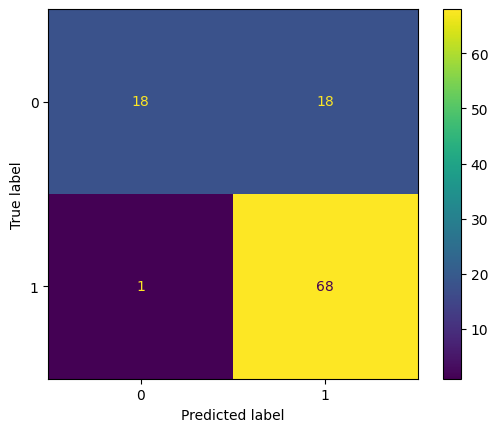

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import precision_score, recall_score, f1_score
precision_rf = precision_score(y_test,rf_clf.predict(x_test[['Credit_History', 'Dependents_2', 'Dependents_3+','Property_Area_Semiurban', 'Property_Area_Urban', 'ApplicantIncome',
       'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Total_Income']]))
recall_rf= recall_score(y_test, rf_clf.predict(x_test[['Credit_History', 'Dependents_2', 'Dependents_3+','Property_Area_Semiurban', 'Property_Area_Urban', 'ApplicantIncome',
       'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Total_Income']]))
f1_score_rf = f1_score(y_test, rf_clf.predict(x_test[['Credit_History', 'Dependents_2', 'Dependents_3+','Property_Area_Semiurban', 'Property_Area_Urban', 'ApplicantIncome',
       'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Total_Income']]))
disp=ConfusionMatrixDisplay(confusion_matrix(y_test,rf_clf.predict(x_test[['Credit_History', 'Dependents_2', 'Dependents_3+','Property_Area_Semiurban', 'Property_Area_Urban', 'ApplicantIncome',
       'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Total_Income']])))
disp.plot()

In [ ]:
# import GradientBoostingClassifier
from sklearn.ensemble import GradientBoostingClassifier

gb = GradientBoostingClassifier()
gb.fit(x_train[['Credit_History', 'Dependents_2', 'Dependents_3+','Property_Area_Semiurban', 'Property_Area_Urban', 'ApplicantIncome',
       'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Total_Income']],y_train)

gb_acc_test = accuracy_score(y_test,gb.predict(x_test[['Credit_History', 'Dependents_2', 'Dependents_3+','Property_Area_Semiurban', 'Property_Area_Urban', 'ApplicantIncome',
       'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Total_Income']]))
gb_acc_train=accuracy_score(y_train,gb.predict(x_train[['Credit_History', 'Dependents_2', 'Dependents_3+','Property_Area_Semiurban', 'Property_Area_Urban', 'ApplicantIncome',
       'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Total_Income']]))
print("The Training Accuracy is ",accuracy_score(y_train,gb.predict(x_train[['Credit_History', 'Dependents_2', 'Dependents_3+','Property_Area_Semiurban', 'Property_Area_Urban', 'ApplicantIncome',
       'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Total_Income']])))
print("The Testing Accuracy is",gb_acc_test)

print(" Confusion Matrix: \n",confusion_matrix(y_test,gb.predict(x_test[['Credit_History', 'Dependents_2', 'Dependents_3+','Property_Area_Semiurban', 'Property_Area_Urban', 'ApplicantIncome',
       'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Total_Income']])))


print(" Classification Report:\n ",classification_report(y_test,gb.predict(x_test[['Credit_History', 'Dependents_2', 'Dependents_3+','Property_Area_Semiurban', 'Property_Area_Urban', 'ApplicantIncome',
       'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Total_Income']])))





The Training Accuracy is  0.9206730769230769
The Testing Accuracy is 0.7714285714285715
 Confusion Matrix: 
 [[17 19]
 [ 5 64]]
 Classification Report:
                precision    recall  f1-score   support

           0       0.77      0.47      0.59        36
           1       0.77      0.93      0.84        69

    accuracy                           0.77       105
   macro avg       0.77      0.70      0.71       105
weighted avg       0.77      0.77      0.75       105



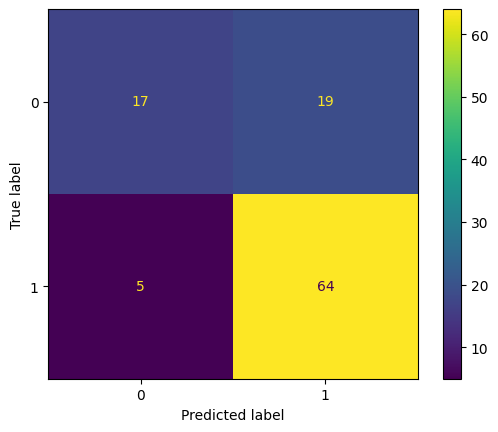

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import precision_score, recall_score, f1_score
precision_gb = precision_score(y_test,gb.predict(x_test[['Credit_History', 'Dependents_2', 'Dependents_3+','Property_Area_Semiurban', 'Property_Area_Urban', 'ApplicantIncome',
       'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Total_Income']]))
recall_gb= recall_score(y_test, gb.predict(x_test[['Credit_History', 'Dependents_2', 'Dependents_3+','Property_Area_Semiurban', 'Property_Area_Urban', 'ApplicantIncome',
       'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Total_Income']]))
f1_score_gb = f1_score(y_test, gb.predict(x_test[['Credit_History', 'Dependents_2', 'Dependents_3+','Property_Area_Semiurban', 'Property_Area_Urban', 'ApplicantIncome',
       'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Total_Income']]))
disp=ConfusionMatrixDisplay(confusion_matrix(y_test,gb.predict(x_test[['Credit_History', 'Dependents_2', 'Dependents_3+','Property_Area_Semiurban', 'Property_Area_Urban', 'ApplicantIncome',
       'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Total_Income']])))
disp.plot()

In [ ]:
# import ExtraTreesClassifier

from sklearn.ensemble import ExtraTreesClassifier

etc = ExtraTreesClassifier()
etc.fit(x_train[['Credit_History', 'Dependents_2', 'Dependents_3+','Property_Area_Semiurban', 'Property_Area_Urban', 'ApplicantIncome',
       'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Total_Income']],y_train)

etc_acc_test = accuracy_score(y_test,etc.predict(x_test[['Credit_History', 'Dependents_2', 'Dependents_3+','Property_Area_Semiurban', 'Property_Area_Urban', 'ApplicantIncome',
       'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Total_Income']]))
etc_acc_train=accuracy_score(y_train,etc.predict(x_train[['Credit_History', 'Dependents_2', 'Dependents_3+','Property_Area_Semiurban', 'Property_Area_Urban', 'ApplicantIncome',
       'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Total_Income']]))
print("The Training Accuracy is ",accuracy_score(y_train,etc.predict(x_train[['Credit_History', 'Dependents_2', 'Dependents_3+','Property_Area_Semiurban', 'Property_Area_Urban', 'ApplicantIncome',
       'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Total_Income']])))
print("The Testing Accuracy is",etc_acc_test)

print(" Confusion Matrix: \n",confusion_matrix(y_test,etc.predict(x_test[['Credit_History', 'Dependents_2', 'Dependents_3+','Property_Area_Semiurban', 'Property_Area_Urban', 'ApplicantIncome',
       'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Total_Income']])))


print(" Classification Report:\n ",classification_report(y_test,etc.predict(x_test[['Credit_History', 'Dependents_2', 'Dependents_3+','Property_Area_Semiurban', 'Property_Area_Urban', 'ApplicantIncome',
       'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Total_Income']])))


The Training Accuracy is  1.0
The Testing Accuracy is 0.7904761904761904
 Confusion Matrix: 
 [[19 17]
 [ 5 64]]
 Classification Report:
                precision    recall  f1-score   support

           0       0.79      0.53      0.63        36
           1       0.79      0.93      0.85        69

    accuracy                           0.79       105
   macro avg       0.79      0.73      0.74       105
weighted avg       0.79      0.79      0.78       105



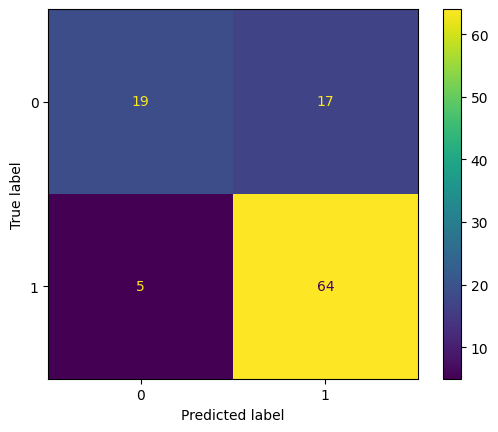

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import precision_score, recall_score, f1_score
precision_etc = precision_score(y_test,etc.predict(x_test[['Credit_History', 'Dependents_2', 'Dependents_3+','Property_Area_Semiurban', 'Property_Area_Urban', 'ApplicantIncome',
       'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Total_Income']]))
recall_etc= recall_score(y_test, etc.predict(x_test[['Credit_History', 'Dependents_2', 'Dependents_3+','Property_Area_Semiurban', 'Property_Area_Urban', 'ApplicantIncome',
       'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Total_Income']]))
f1_score_etc = f1_score(y_test, etc.predict(x_test[['Credit_History', 'Dependents_2', 'Dependents_3+','Property_Area_Semiurban', 'Property_Area_Urban', 'ApplicantIncome',
       'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Total_Income']]))
disp=ConfusionMatrixDisplay(confusion_matrix(y_test,etc.predict(x_test[['Credit_History', 'Dependents_2', 'Dependents_3+','Property_Area_Semiurban', 'Property_Area_Urban', 'ApplicantIncome',
       'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Total_Income']])))
disp.plot()

In [ ]:
# comparing all models accuracy by creating a df
models = ['KNN','Decision Tree', 'Random Forest','Gradient Boosting','Extra Tree Classifier']
train_score=[knn_acc_train,dtc_acc_train,rf_acc_train,gb_acc_train,etc_acc_train]
test_score=[knn_acc_test,dtc_acc_test,rf_acc_test,gb_acc_test,etc_acc_test]
prec=[precision_knn,precision_dtc,precision_rf,precision_gb,precision_etc]
recall=[recall_knn,recall_dtc,recall_rf,recall_gb,recall_etc]
f1_score=[f1_score_knn,f1_score_dtc,f1_score_rf,f1_score_gb,f1_score_etc]

model_df=pd.DataFrame({'Model':models,
                       'test Score':test_score,
                       'train score':train_score,
                       'precision':prec,
                       'recall':recall,
                       'f1_score':f1_score})
model_df

,Model,test Score,train score,precision,recall,f1_score
0,KNN,0.809524,0.807692,0.775281,1.000000,0.873418
1,Decision Tree,0.742857,0.798077,0.718750,1.000000,0.836364
2,Random Forest,0.819048,0.882212,0.790698,0.985507,0.877419
3,Gradient Boosting,0.771429,0.920673,0.771084,0.927536,0.842105
4,Extra Tree Classifier,0.790476,1.000000,0.790123,0.927536,0.853333
